In [1]:
import pandas as pd
#from dataenforce import Dataset
#DMarket_insight = Dataset["id", "date", ...]
data = pd.read_csv("../datasets/market_insights_overview_all_2021_11_12.csv")
data["date"] = pd.to_datetime(data["date"])


In [2]:
from matplotlib import pyplot as plt

In [3]:
from utils import save_fig_for_raport
print(plt.style.available)
# plt.style.use("seaborn")
plt.rcParams['font.size'] = '16'
# mpl_style()

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [4]:

from utils import dataframe_to_latex_tabular

In [5]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35966868 entries, 0 to 35966867
Data columns (total 9 columns):
 #   Column           Dtype         
---  ------           -----         
 0   id               int64         
 1   product_id       int64         
 2   manufacturer_id  int64         
 3   cat_id           int64         
 4   root_cat_id      int64         
 5   date             datetime64[ns]
 6   hits             int64         
 7   clicks           int64         
 8   last_modified    object        
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 2.4+ GB


In [6]:
categories = pd.read_csv("../datasets/solr_categories_2021_11_29.csv")
categories.head()

parent     title_no internal_doc_type  \
0          Vannsport      Vannski          category   
1       Sportsutstyr    Vannsport          category   
2         Hagearbeid  Vannspreder          category   
3  Hansker og votter       Vanter          category   
4          Tilhenger   Varehenger          category   

                                           image_url    description  \
0  /3131/3131139/da3b0f02940b4bf2a6831a4a2113fdc7...    1 produkter   
1                 /1698/1698422/original.36x75!m.jpg  870 produkter   
2                /1705/1705821/original.132x75!m.jpg   35 produkter   
3                 /3071/3071632/original.68x75!m.jpg  758 produkter   
4                       /3154/3154296/i.192x75!m.jpg   99 produkter   

         title title_phonetic                      url        tags  \
0      Vannski        Vannski      /kategorier/vannski    products   
1    Vannsport      Vannsport    /kategorier/vannsport  categories   
2  Vannspreder    Vannspreder  /kategorier/vannspreder    products   
3       Vanter         Vanter       /kategorier/vanter      filter   
4   Varehenger     Varehenger   /kategorier/varehenger      filter   

                                                path  ...  internal_doc_id  \
0  Sport og friluftsliv>Sportsutstyr>Vannsport>Va...  ...            13053   
1        Sport og friluftsliv>Sportsutstyr>Vannsport  ...            10065   
2            Hage og utemiljø>Hagearbeid>Vannspreder  ...            11661   
3  Klær og sko>Accessories og tilbehør>Hansker og...  ...            12811   
4                     Bilutstyr>Tilhenger>Varehenger  ...            13209   

   popularity                  root      alias title_edge_ngram     id  \
0        1004  Sport og friluftsliv  water ski          Vannski  13053   
1        4000  Sport og friluftsliv        NaN        Vannsport  10065   
2        1046      Hage og utemiljø    spreder      Vannspreder  11661   
3        5897           Klær og sko        NaN           Vanter  12811   
4        1469             Bilutstyr        NaN       Varehenger  13209   

    alias_no  adult             last_modified  \
0  water ski  False  2021-11-29T04:01:40.783Z   
1        NaN  False  2021-11-29T04:01:40.783Z   
2    spreder  False  2021-11-29T04:01:40.783Z   
3        NaN  False  2021-11-29T04:01:40.783Z   
4        NaN  False  2021-11-29T04:01:40.783Z   

                                             parents  
0        Sport og friluftsliv,Sportsutstyr,Vannsport  
1                  Sport og friluftsliv,Sportsutstyr  
2                        Hage og utemiljø,Hagearbeid  
3  Klær og sko,Accessories og tilbehør,Hansker og...  
4                                Bilutstyr,Tilhenger  

[5 rows x 21 columns]

In [7]:
# Join market_insight table with category names
category_names = categories[[ "internal_doc_id", "title"]]
category_id_to_names_map = dict(map(lambda x: (x["internal_doc_id"], x["title"]), category_names.to_dict("records")))
category_name_to_id_map = dict(map(lambda x: (x["title"], x["internal_doc_id"]), category_names.to_dict("records")))

In [8]:
#print(category_names["title"])
#categories_file = open("categories.txt", "w")
#for cat_line in category_names["title"]:
#    categories_file.write(cat_line)
#    categories_file.write("\n")
#categories_file.close()

In [9]:
import matplotlib.pyplot as plt
import numpy as np
# Set pandas to use decimal insteaf of scientific e^x notaion
pd.set_option("display.float_format", lambda x: "%.0f" % x)

interesting_data = data[["date", "hits", "clicks", "product_id", "cat_id"]]

print(f"Unique products: {data['product_id'].nunique()}")
print(f"Unique categories: {data['cat_id'].nunique()}")


grouped = interesting_data.groupby(["cat_id", "date"], as_index=False).sum()
# Filter away early 2018 data as it seems to contain errors
grouped = grouped.loc[grouped['date'] > '2018-12-01']

print(grouped)
grouped.describe()

Unique products: 310499
Unique categories: 1325


         cat_id       date  hits  clicks  product_id
120           2 2018-12-02  2450     301   293349707
121           2 2018-12-03  2889     418   324468137
122           2 2018-12-04  3048     413   319458697
123           2 2018-12-05  2777     381   305158187
124           2 2018-12-06  2882     363   292147192
...         ...        ...   ...     ...         ...
1078862   13771 2021-11-07     0       4     1061271
1078863   13771 2021-11-08    36       6     3164575
1078864   13771 2021-11-09    16       1     1572626
1078865   13771 2021-11-10    19      10     2103281
1078866   13771 2021-11-11    24       2     1572628

[1006910 rows x 5 columns]


cat_id    hits  clicks  product_id
count 1006910 1006910 1006910     1006910
mean    10450     128      32    11475671
std      3865     422     129    24455654
min         2       0       0        8791
25%     11205       9       2     1874971
50%     11656      29       7     4684672
75%     12086      95      24    11153683
max     13771   60601   53187  1514347598

In [10]:
# Join with category names
grouped_joined= pd.merge(grouped, category_names, how="left", left_on=["cat_id"], right_on=["internal_doc_id"])
grouped_joined.rename(columns={"title": "cat_name"}, inplace=True)
grouped_joined.drop(columns=["internal_doc_id"], inplace=True, axis=1)

In [11]:
dataframe_to_latex_tabular(
  grouped_joined.head().append({"cat_id": "...", "hits":"...", "date": "", "clicks":"...", "product_id": "...", "cat_name":"..."}, ignore_index=True).append(
    grouped_joined.tail()
  ),
  caption="Market Insights Overview dataset", 
  label="market_insights_overview_11-12-21")

I perioden august 2018 til perioden august 2021 ble det registrert 1320 unike kategorier.
Et nevralnett med 1320 i bredde er litt stort kanskje? Det vil også låse modellen til X antall kategorier.
Dette er et argument for å se på hver kategori inviduelt og ha en egen modell per kategori.

Ulempen med det igjen er at det blir veldig mange modeller...

cat_id        42350
date          42350
hits          42350
clicks        42350
product_id    42350
dtype: int64


array([[<AxesSubplot:title={'center':'hits'}>,
        <AxesSubplot:title={'center':'clicks'}>]], dtype=object)

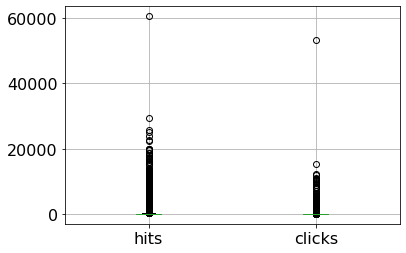

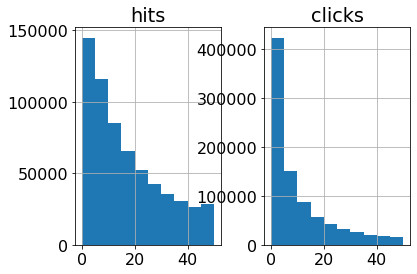

In [12]:
print(grouped[grouped["hits"] == 1].count())
grouped.boxplot(column=["hits", "clicks"])
grouped.hist(column=["hits", "clicks"], range=(0, 50))

The boxplot shows that on most days hits hower around 10 500, and clicks around 8000. There have been one extreme case on 1 day, where 
1 category had 60 000 hits!
The histogram show the distribution, a very few days a year a few categories has a lot of hits.
The longer to the right we get the more days and categories are represented.

/home/archie/code/Masteroppgave/env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


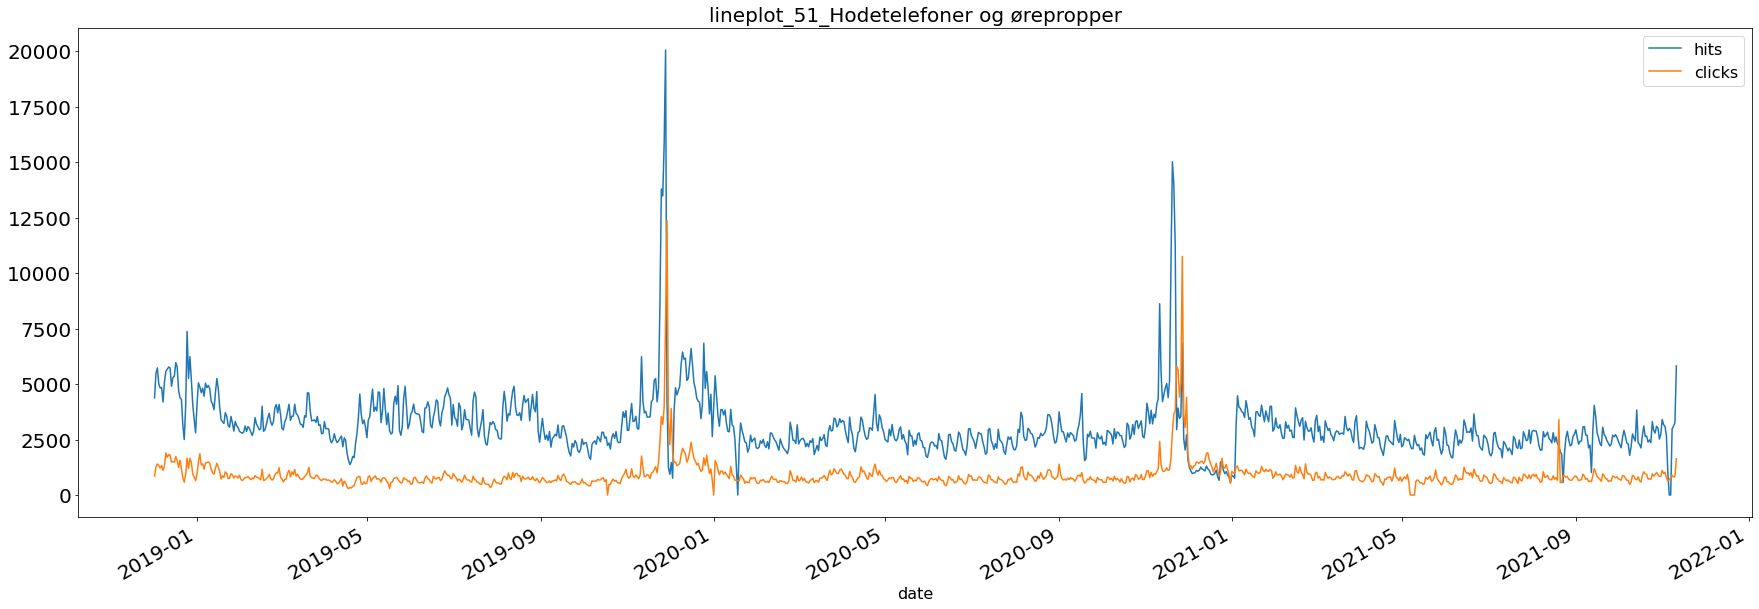

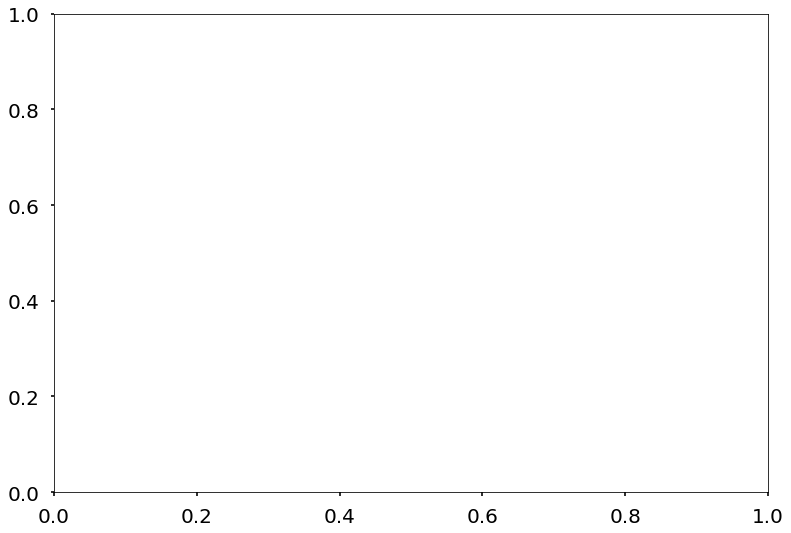

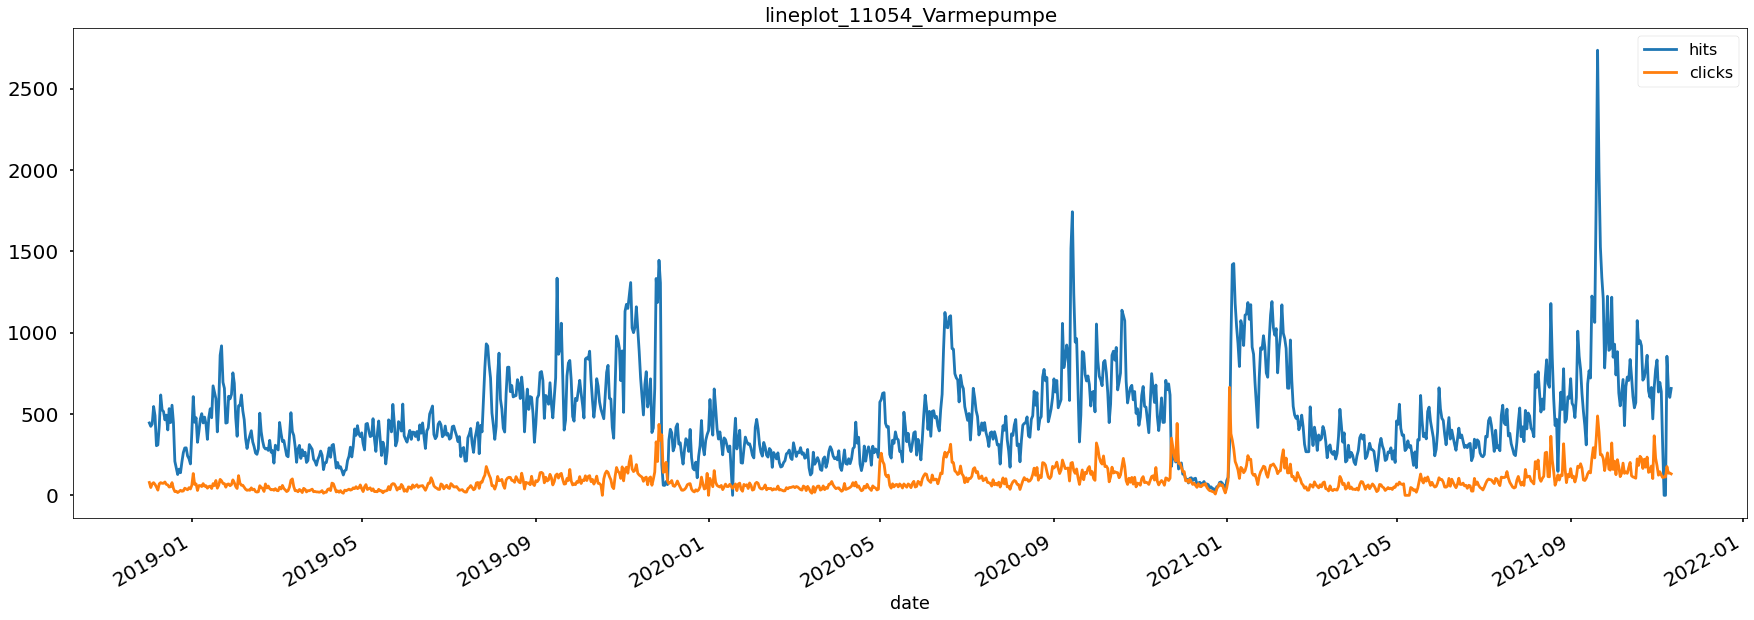

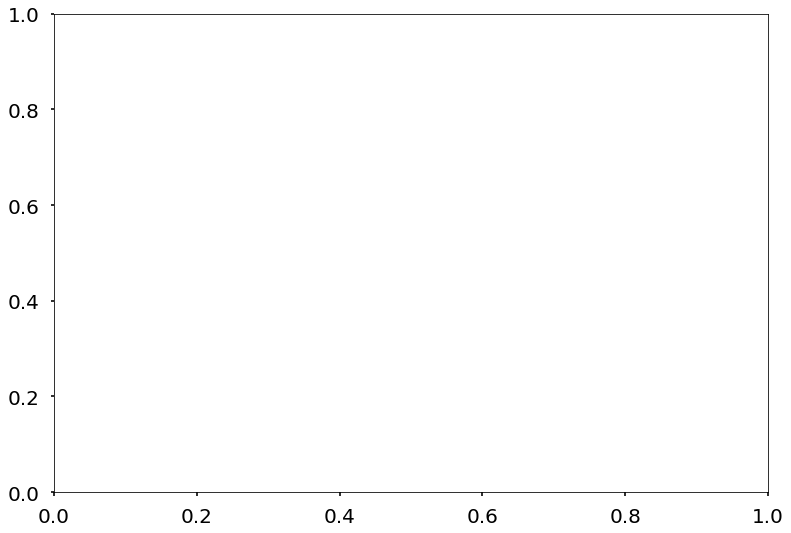

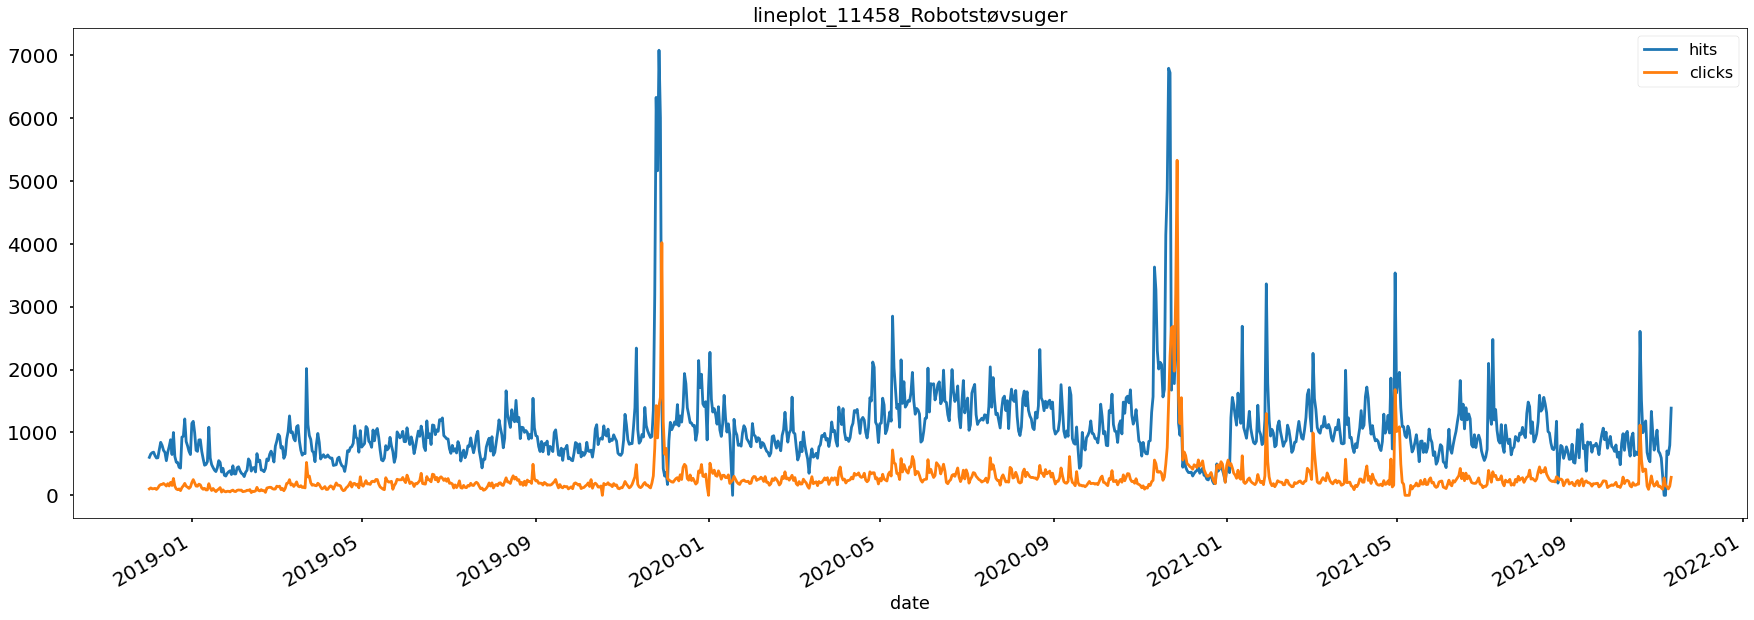

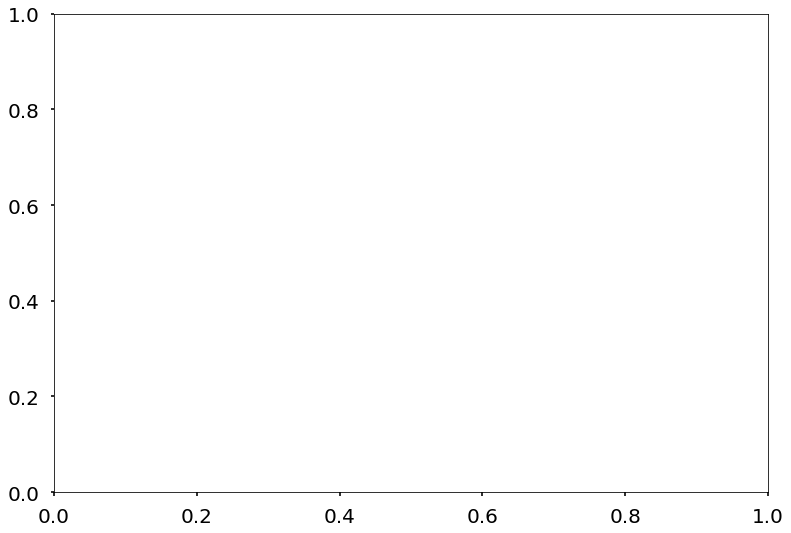

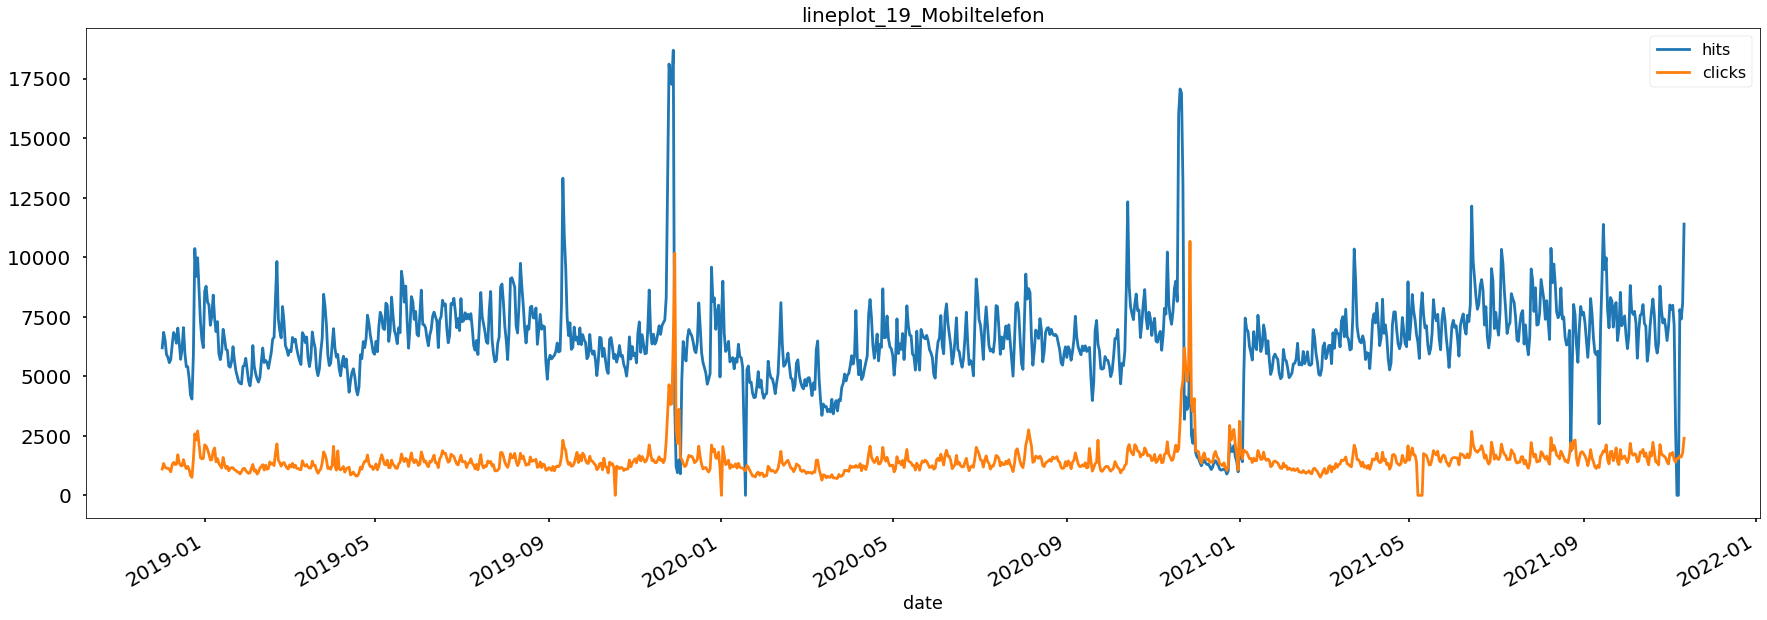

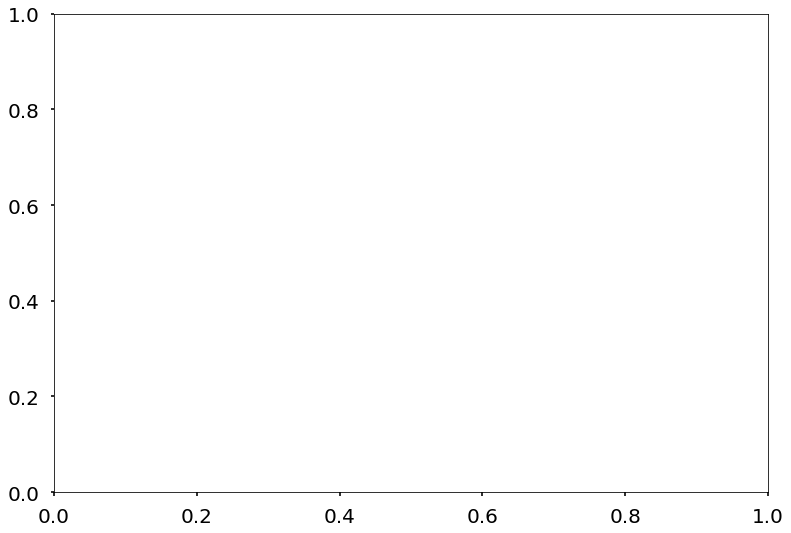

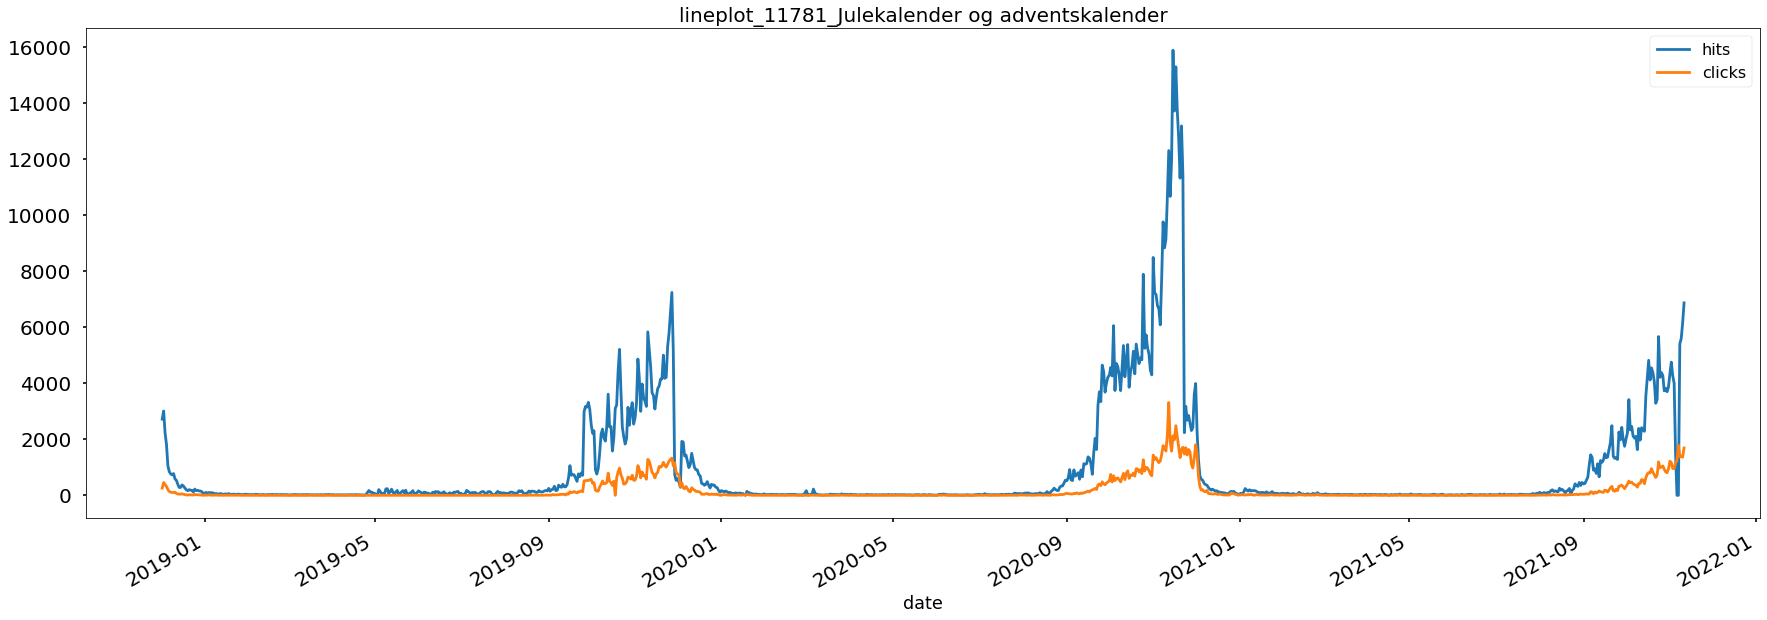

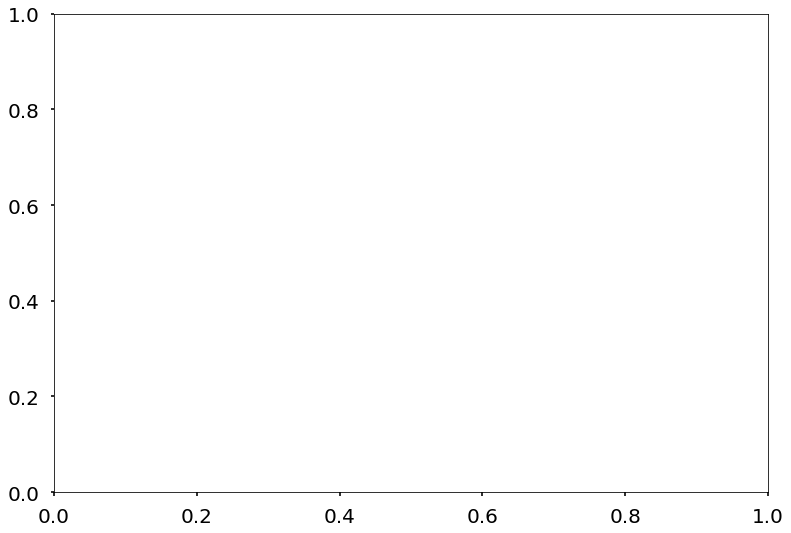

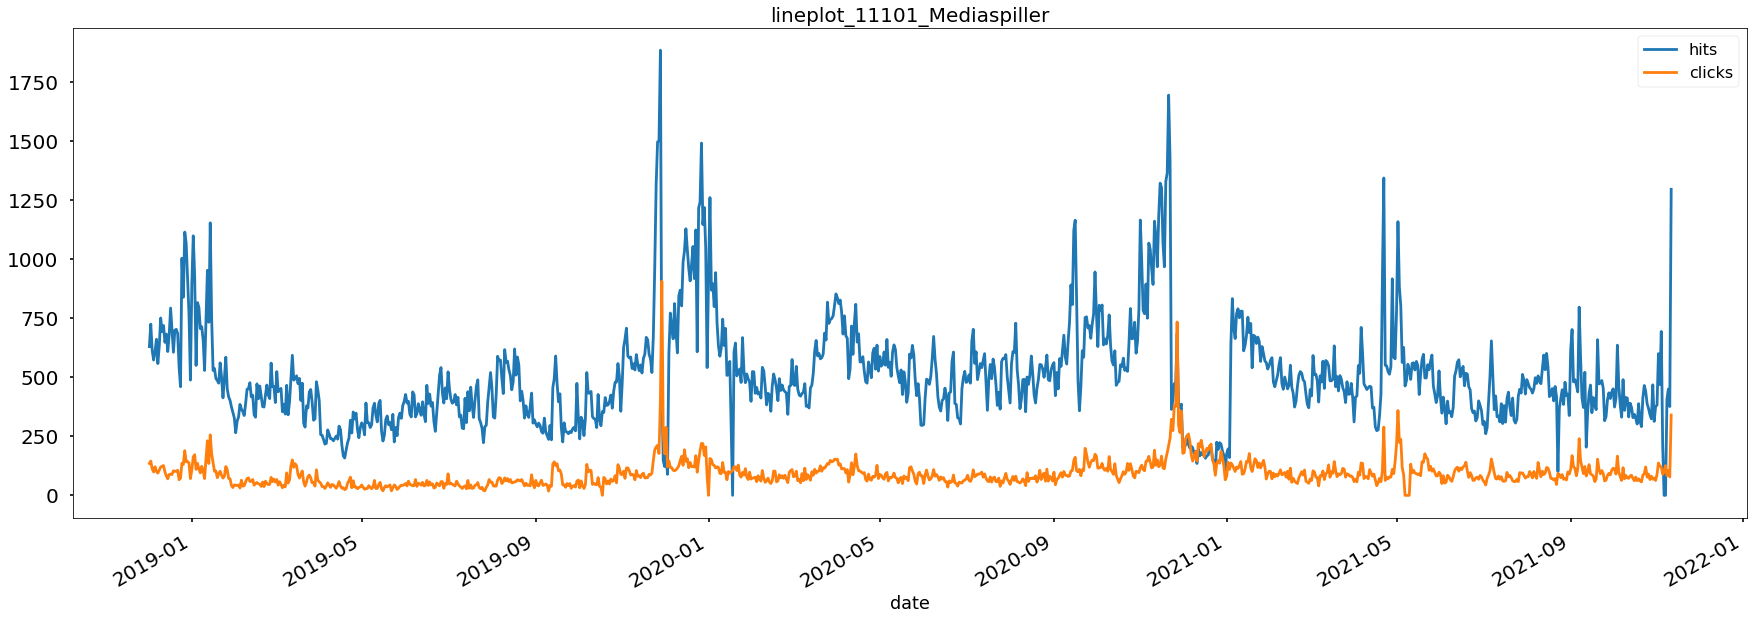

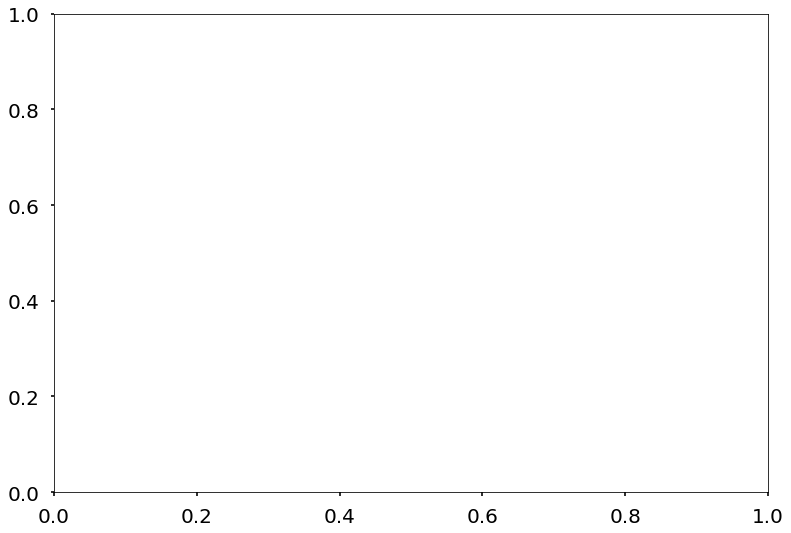

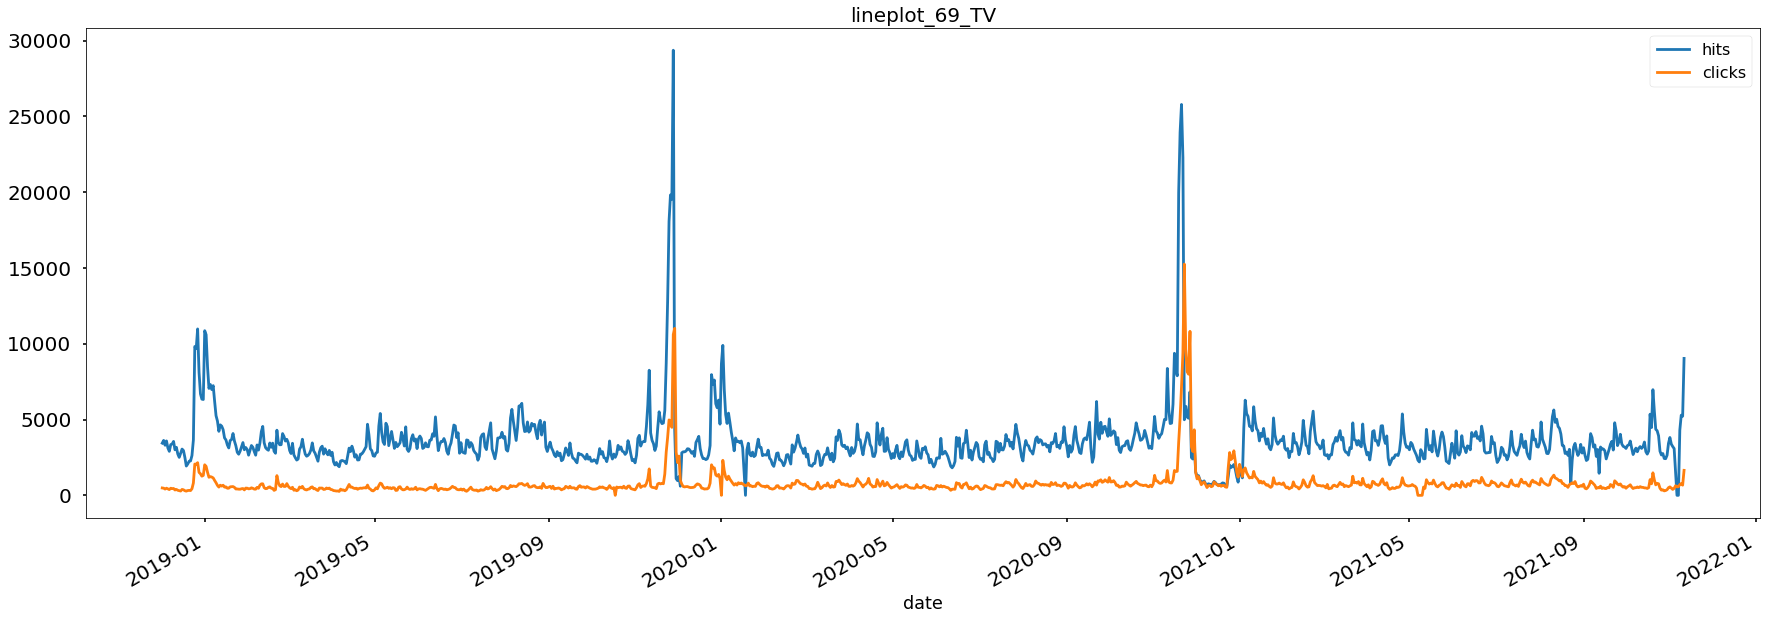

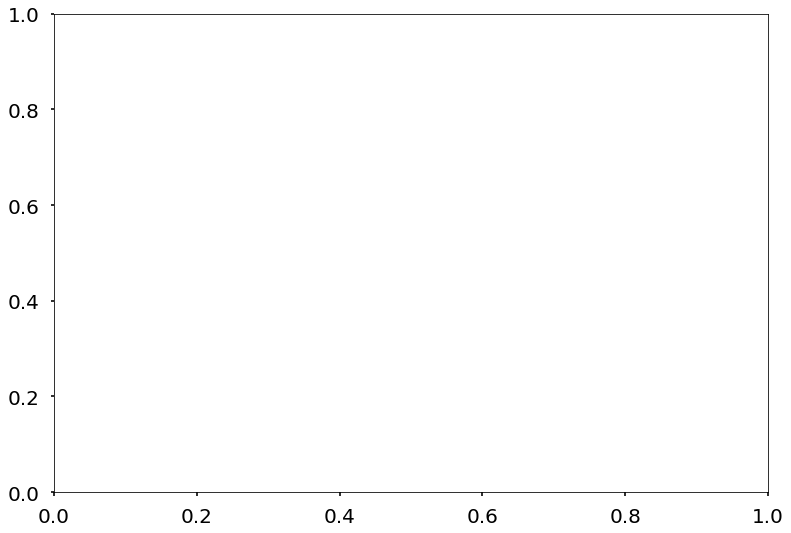

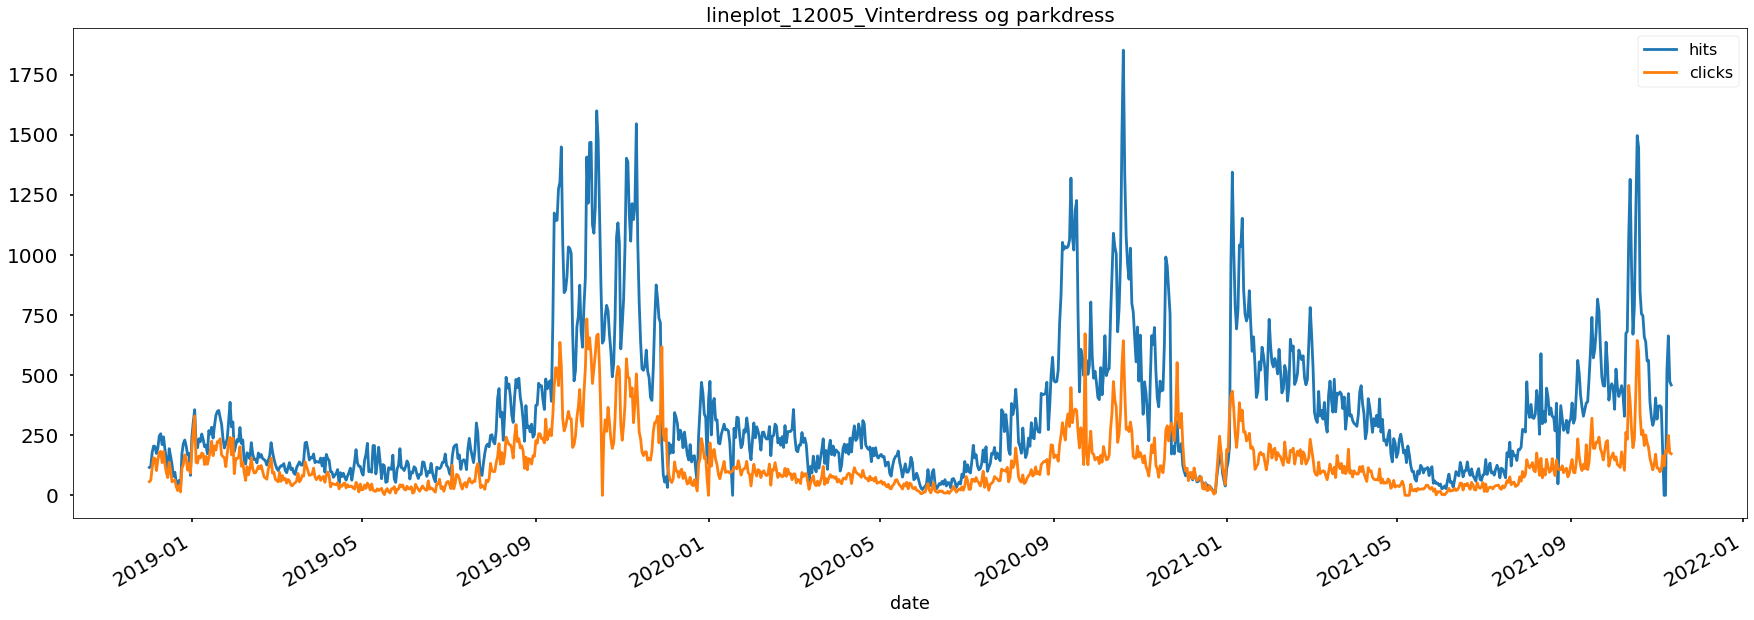

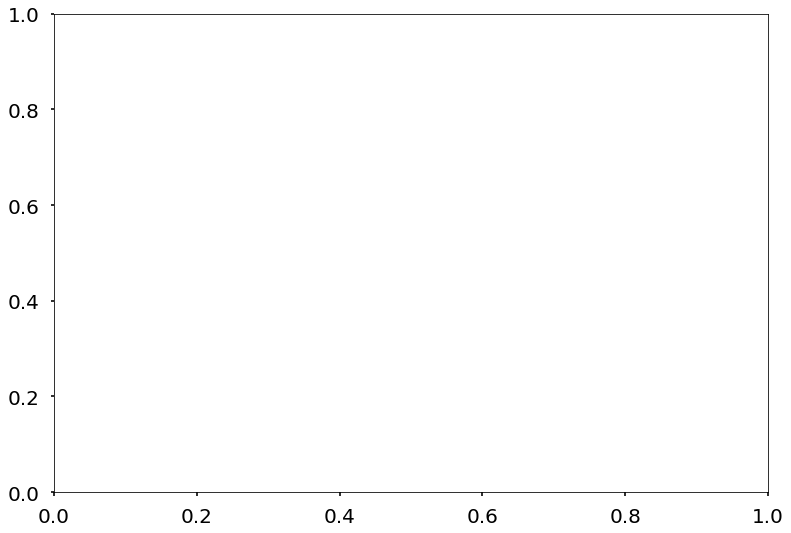

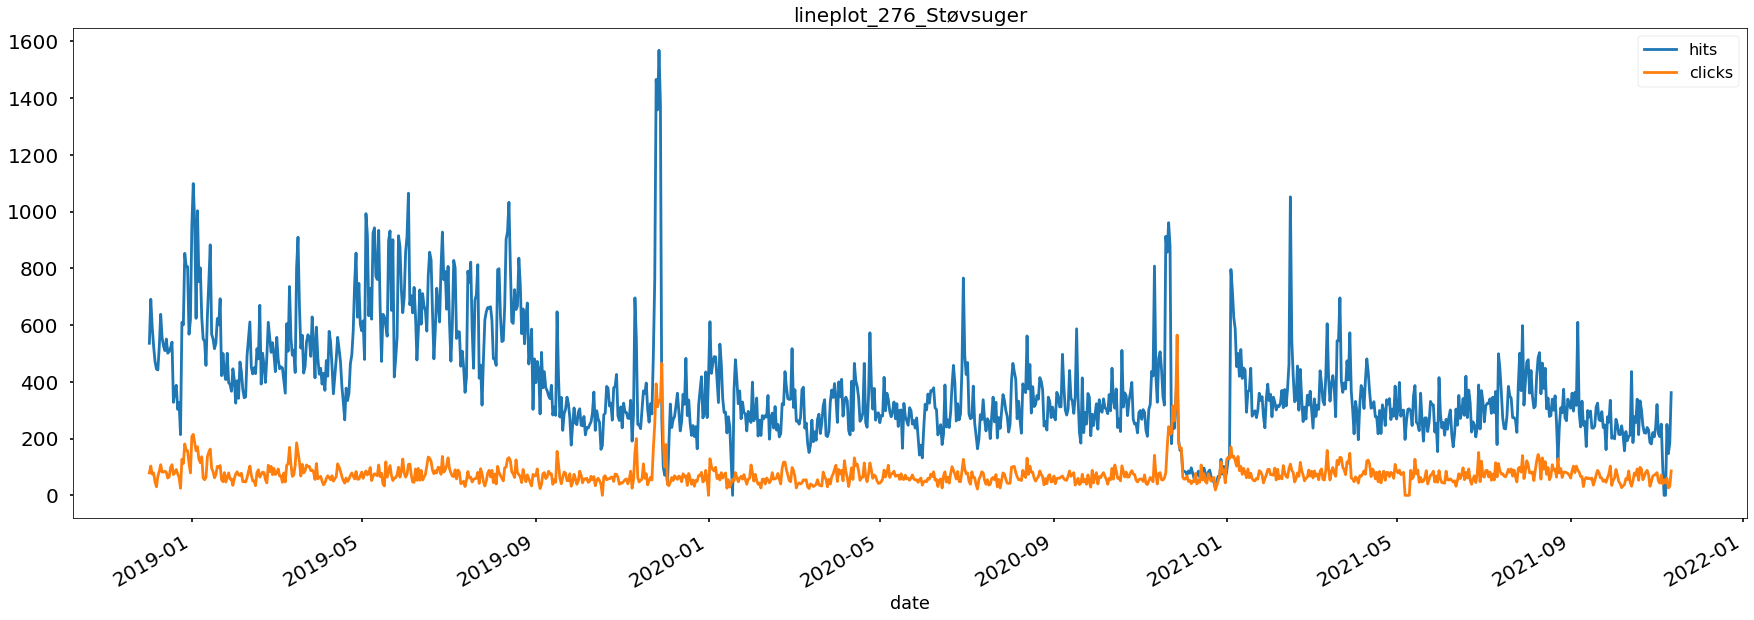

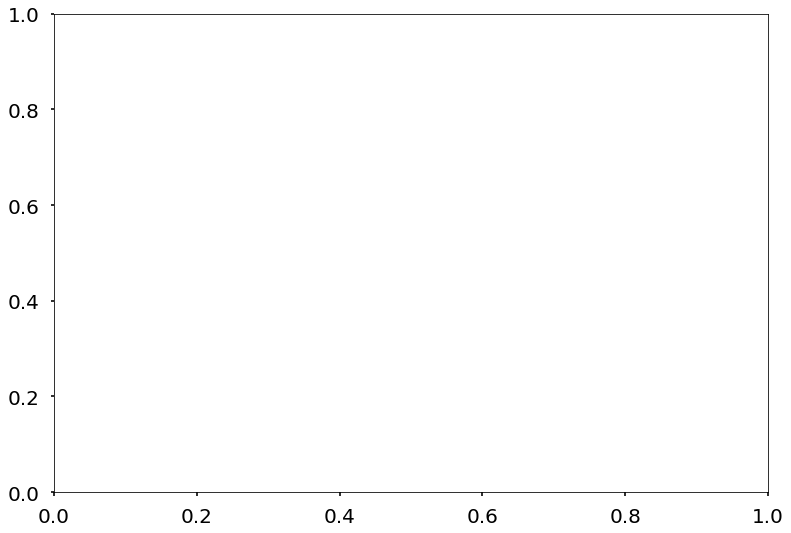

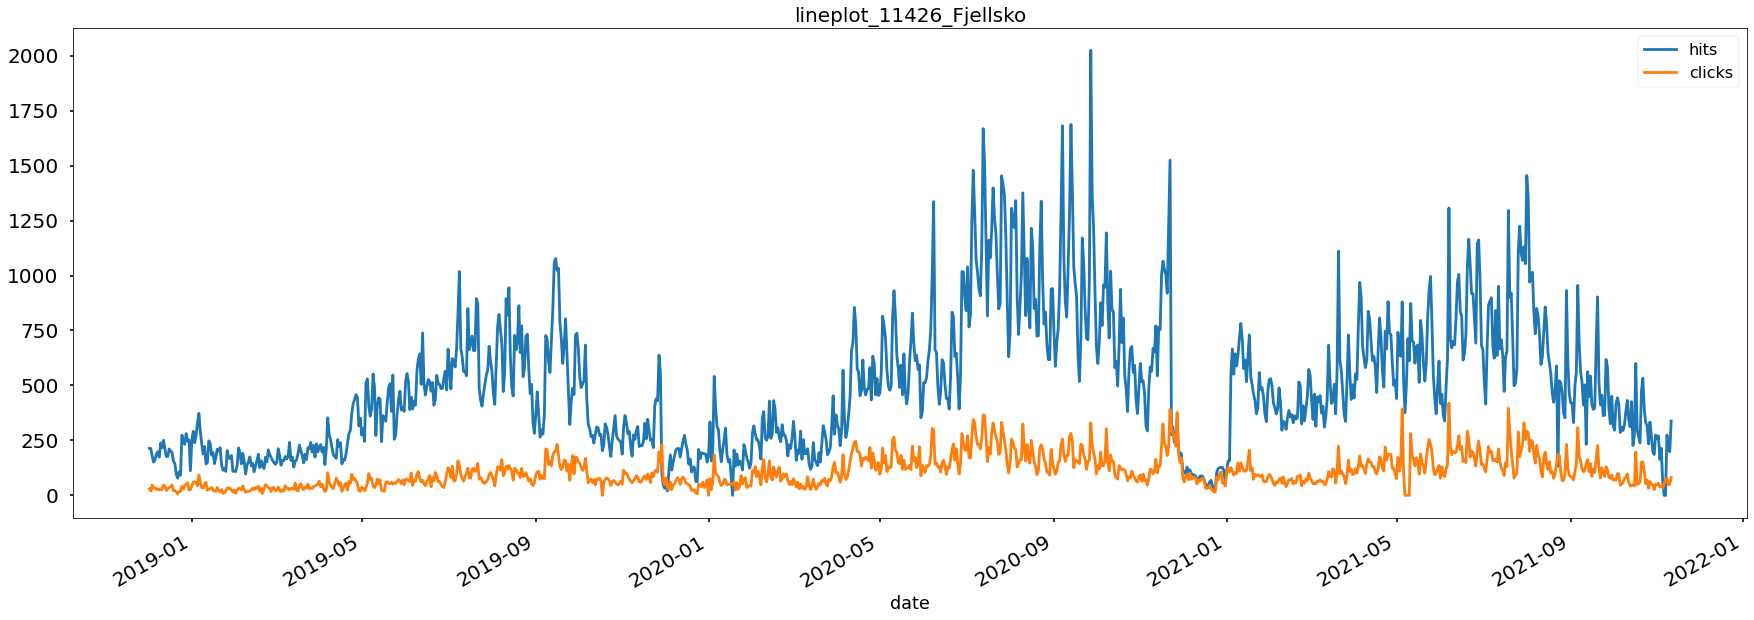

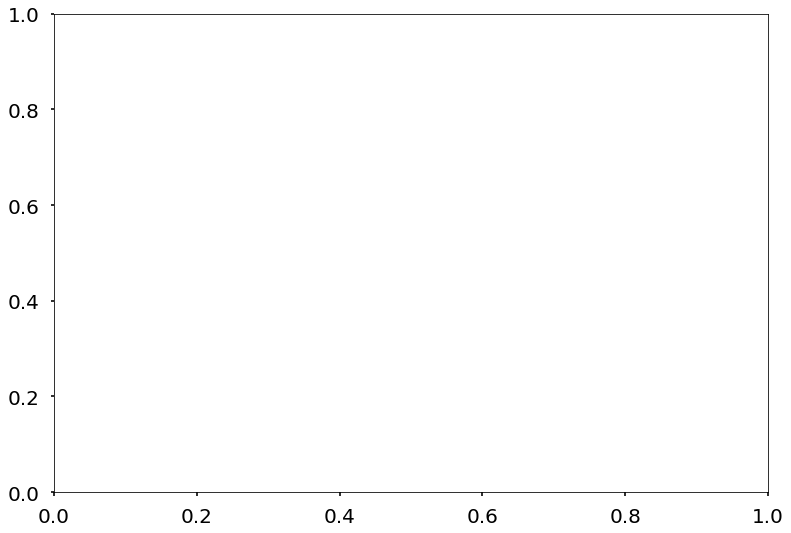

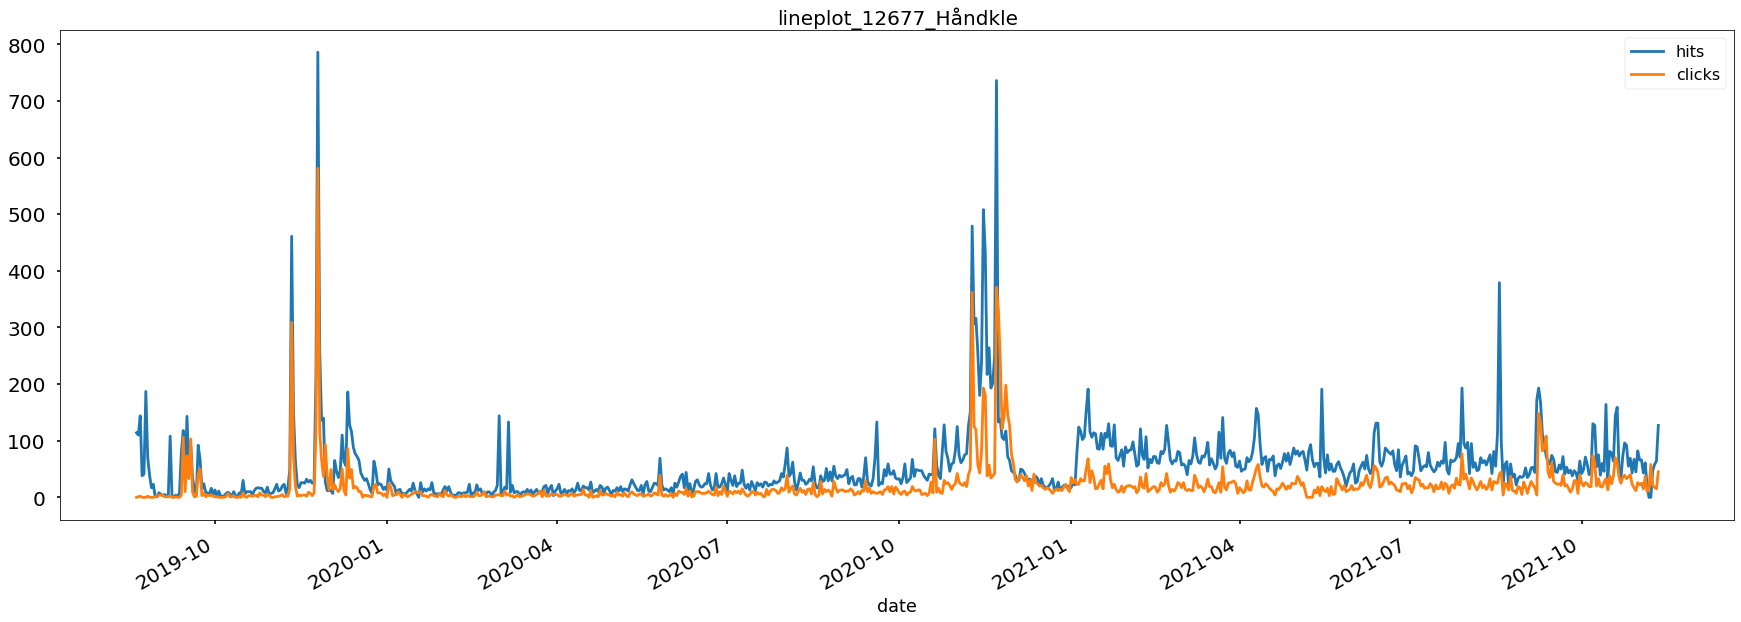

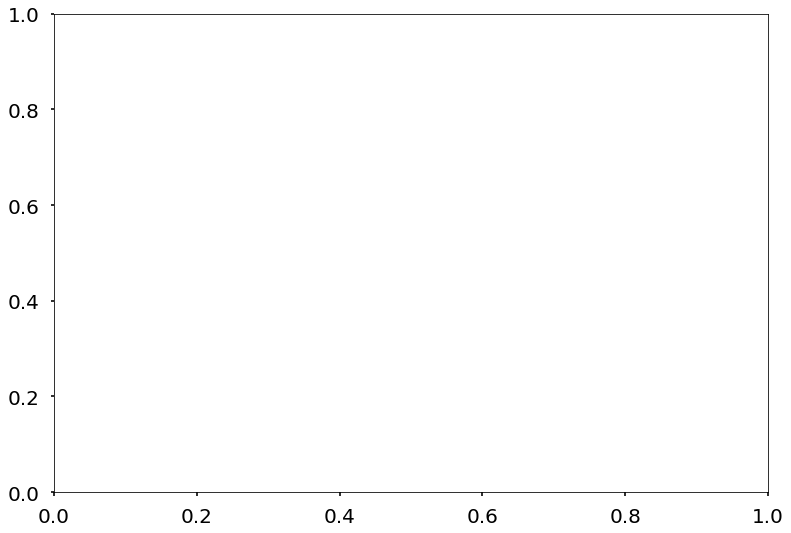

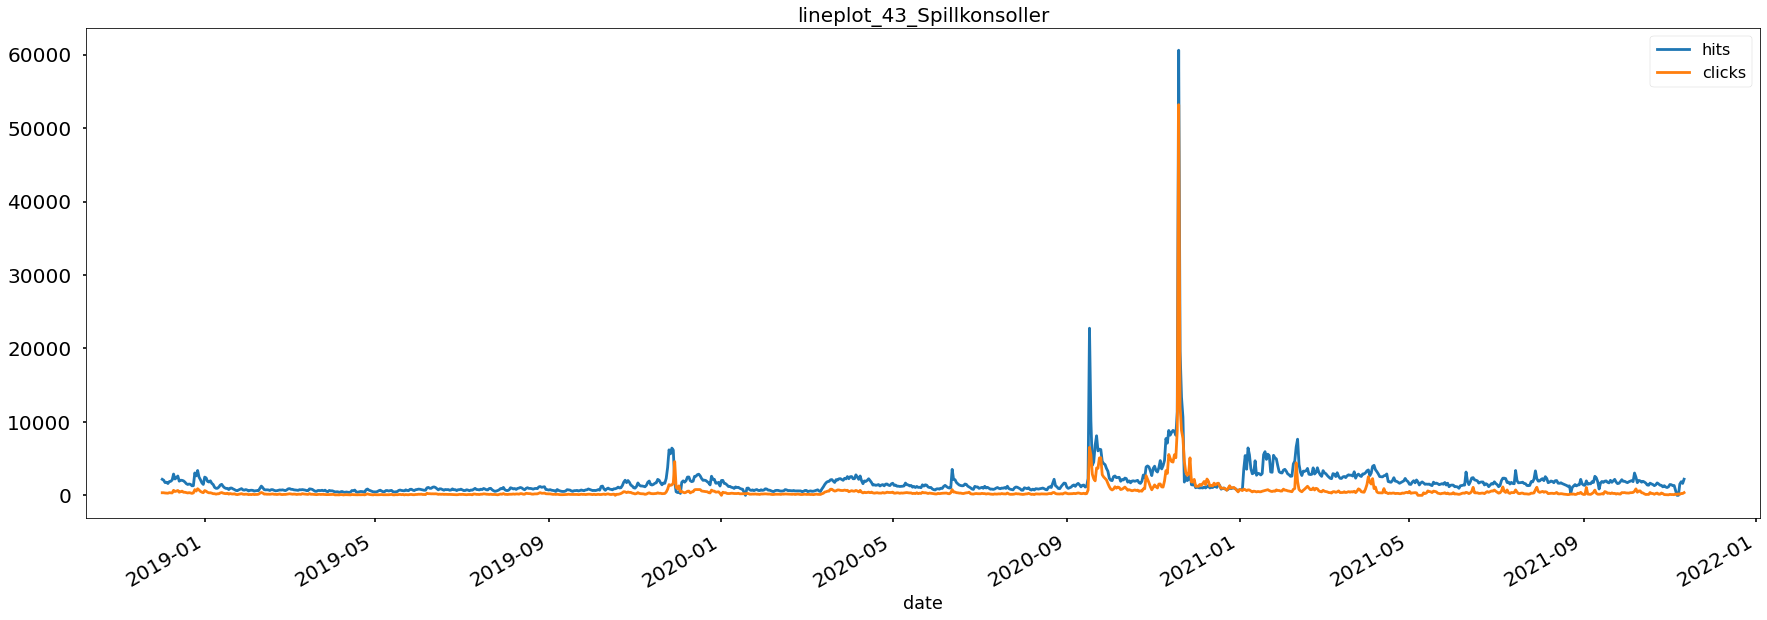

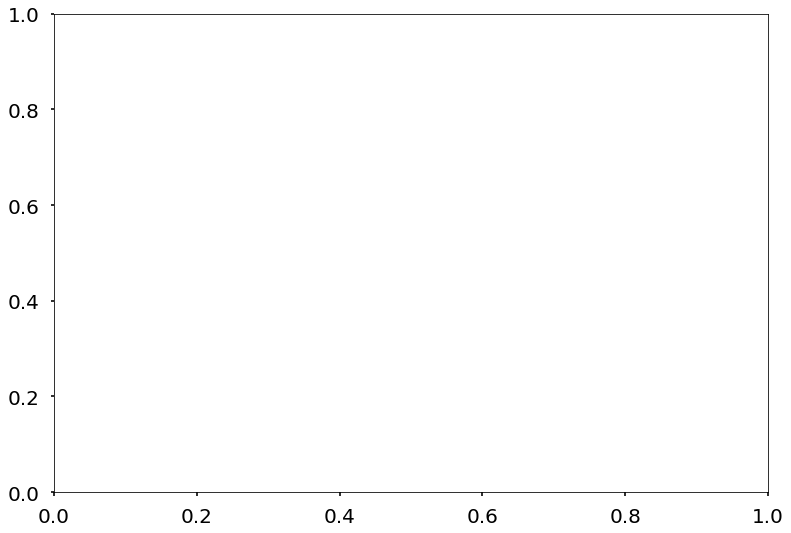

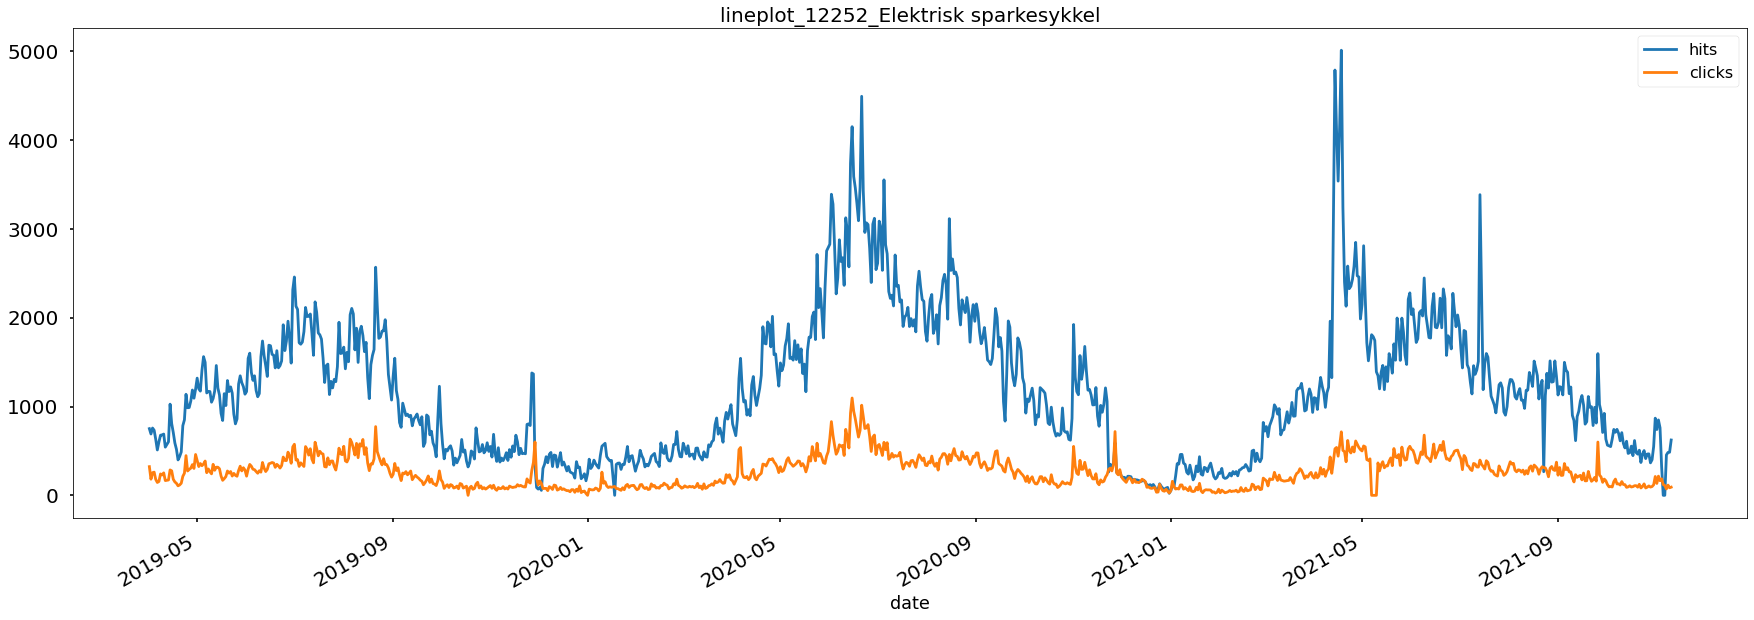

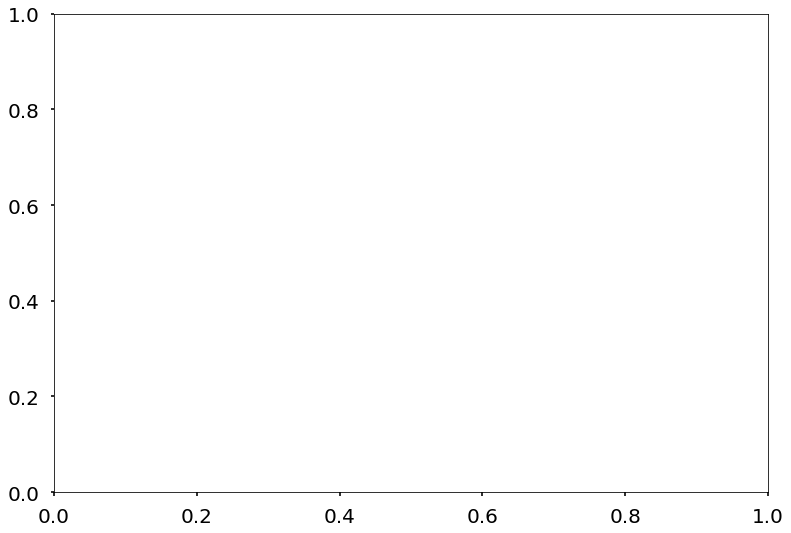

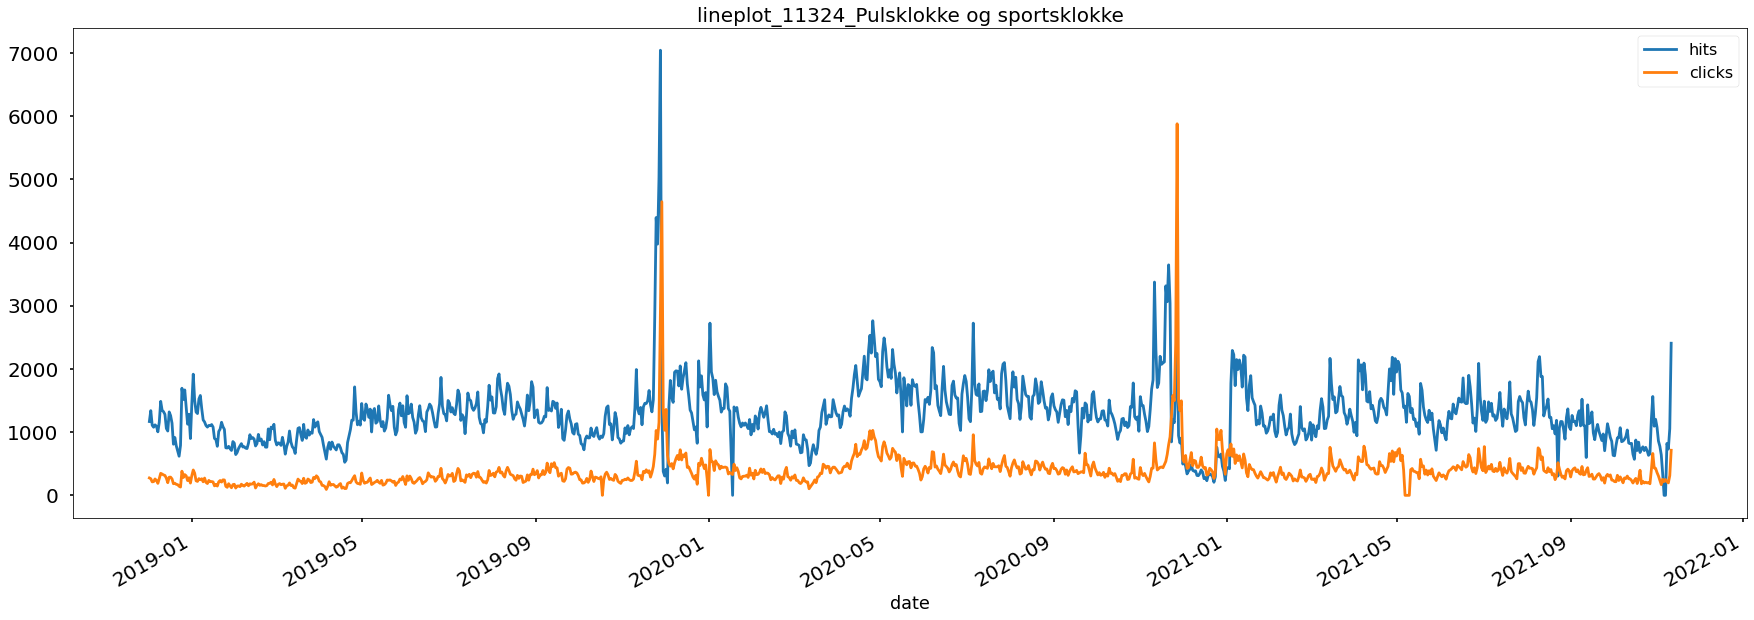

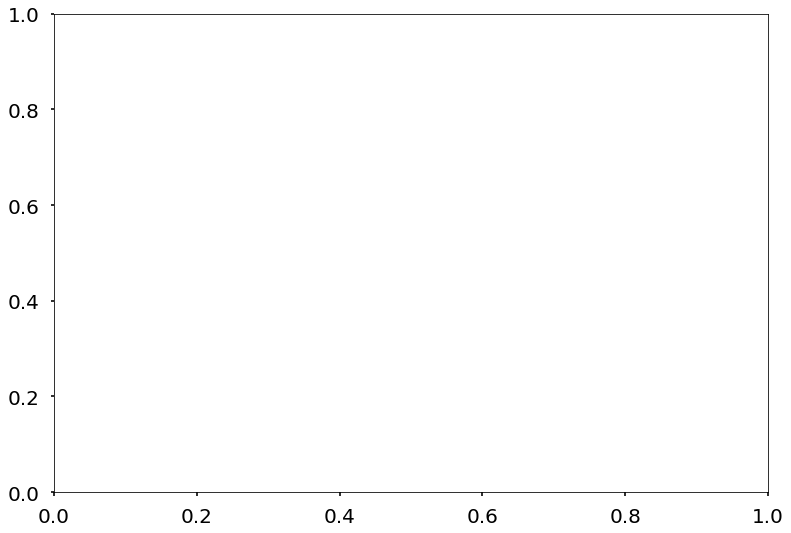

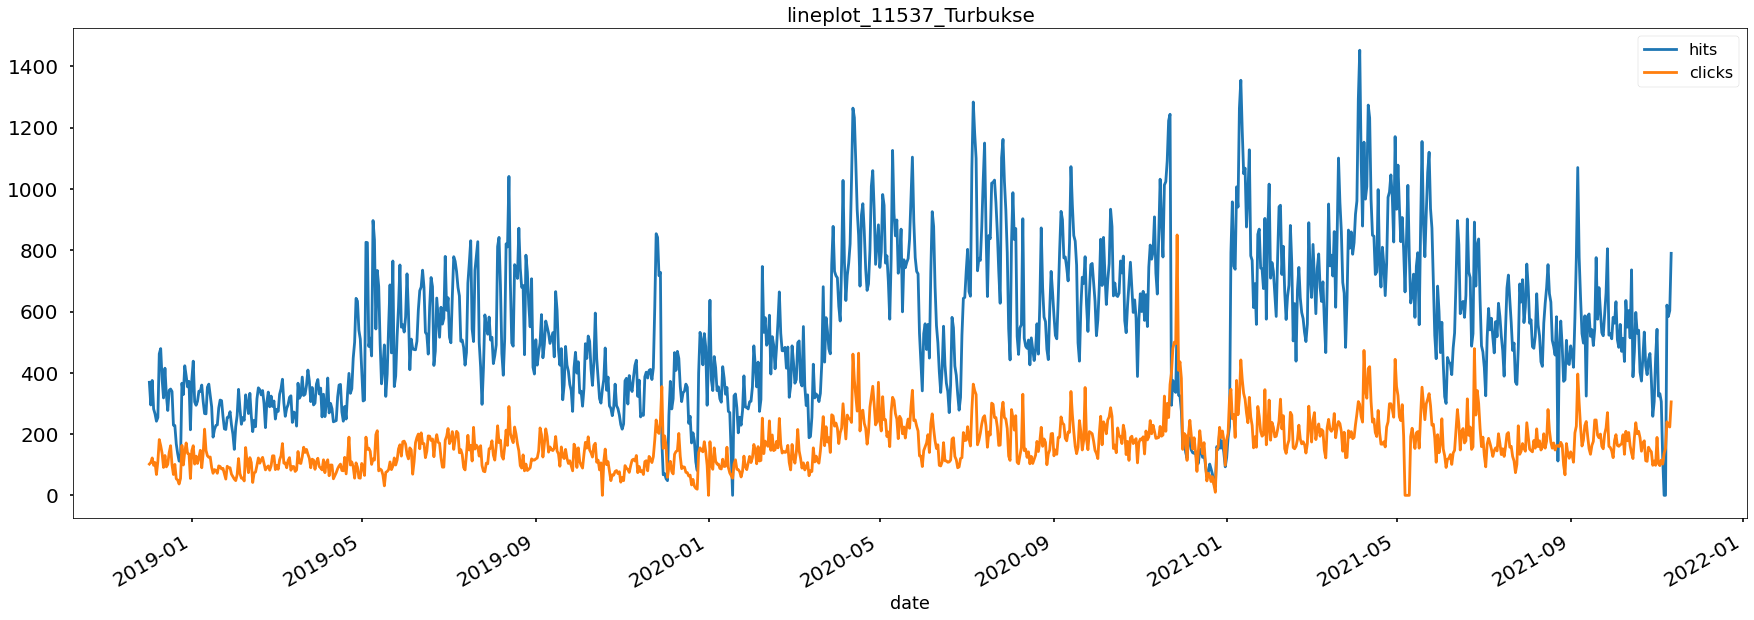

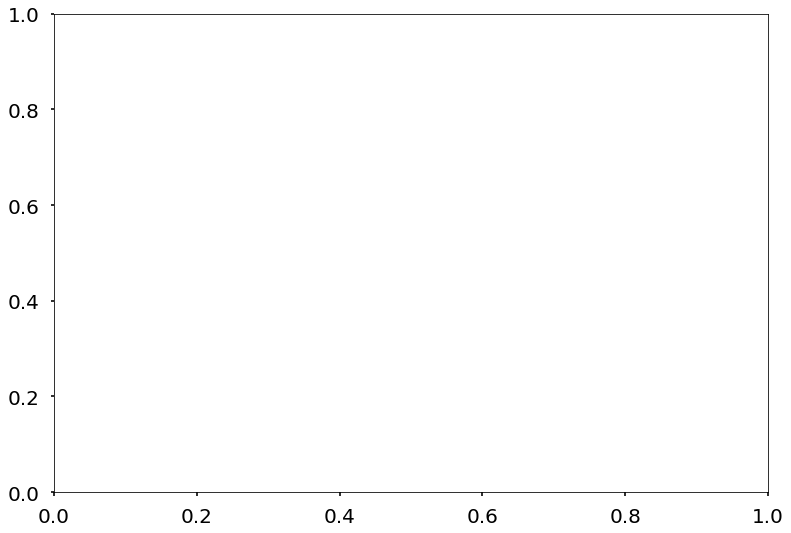

In [13]:
import matplotlib.dates as mdate
date_locator = mdate.MonthLocator()
formatter = mdate.DateFormatter("%Y-%m")
all_categories = data["cat_id"].unique()
for cat in all_categories[:15]:
    cat_name = categories.loc[categories["internal_doc_id"] == cat]["title"]
    save_fig_for_raport(
    grouped[grouped["cat_id"] == cat].plot(
        x="date", 
        y=["hits", "clicks"], 
        title=f"categori_id: {cat_name}", 
        fontsize=20,
        figsize=(30, 10),
        ),f"lineplot_{cat}_{category_id_to_names_map[cat]}")
#interesting_data.plot()
        #.xaxis.set_major_locator(date_locator)
#grouped.plot(x="date", y=["hits", "clicks"],)

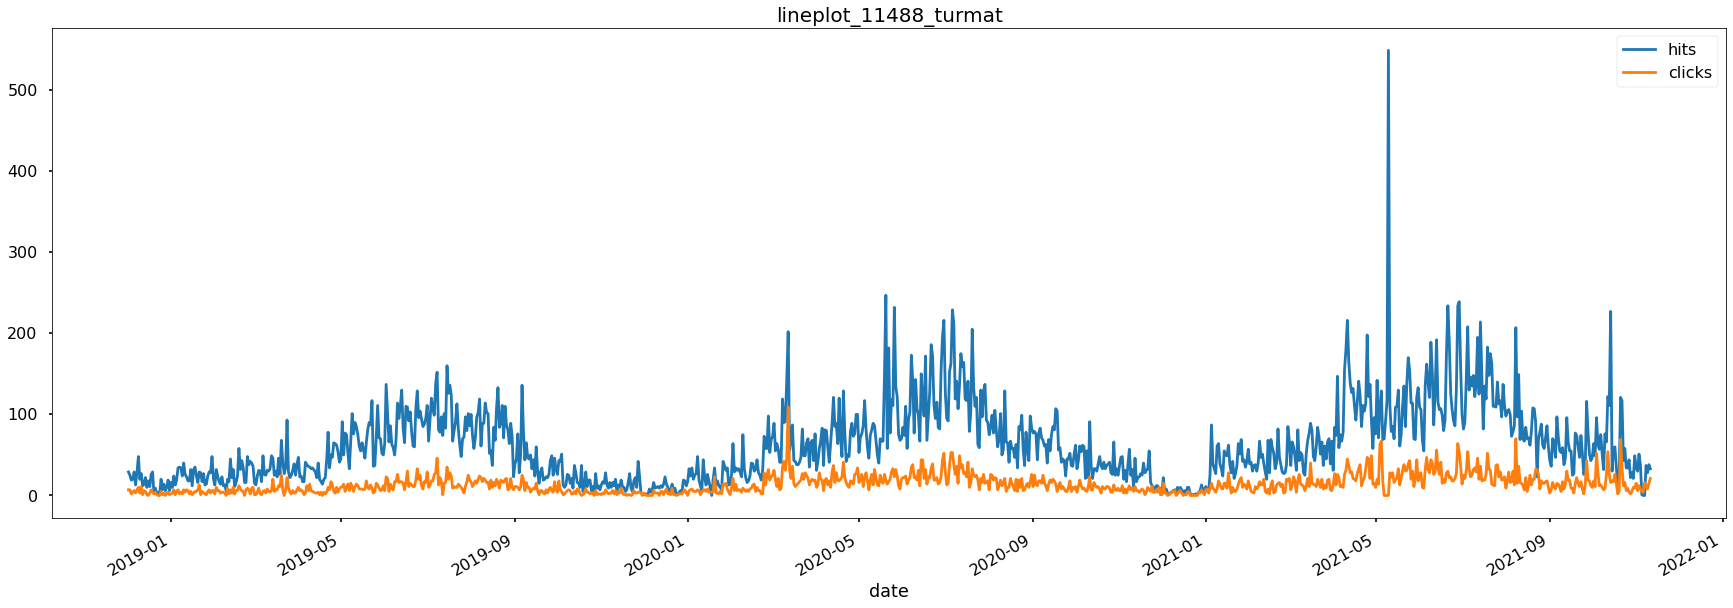

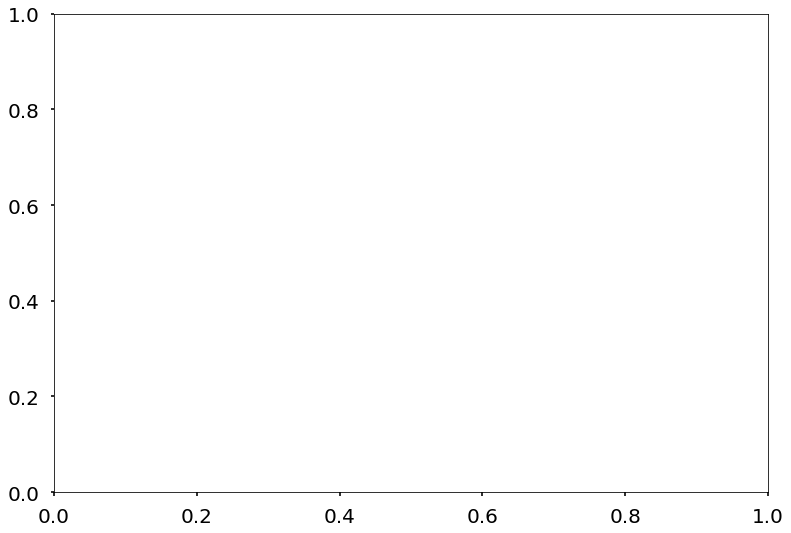

In [14]:
turmat = grouped[grouped["cat_id"] == 11488]
turmat.head()
name = categories.loc[categories["internal_doc_id"] == 11488]
name.head()
save_fig_for_raport(
        turmat.plot(
                x="date", 
                y=["hits", "clicks"], 
                title=f"categori: Turmat", 
                figsize=(30, 10),
        ),f"lineplot_11488_turmat")

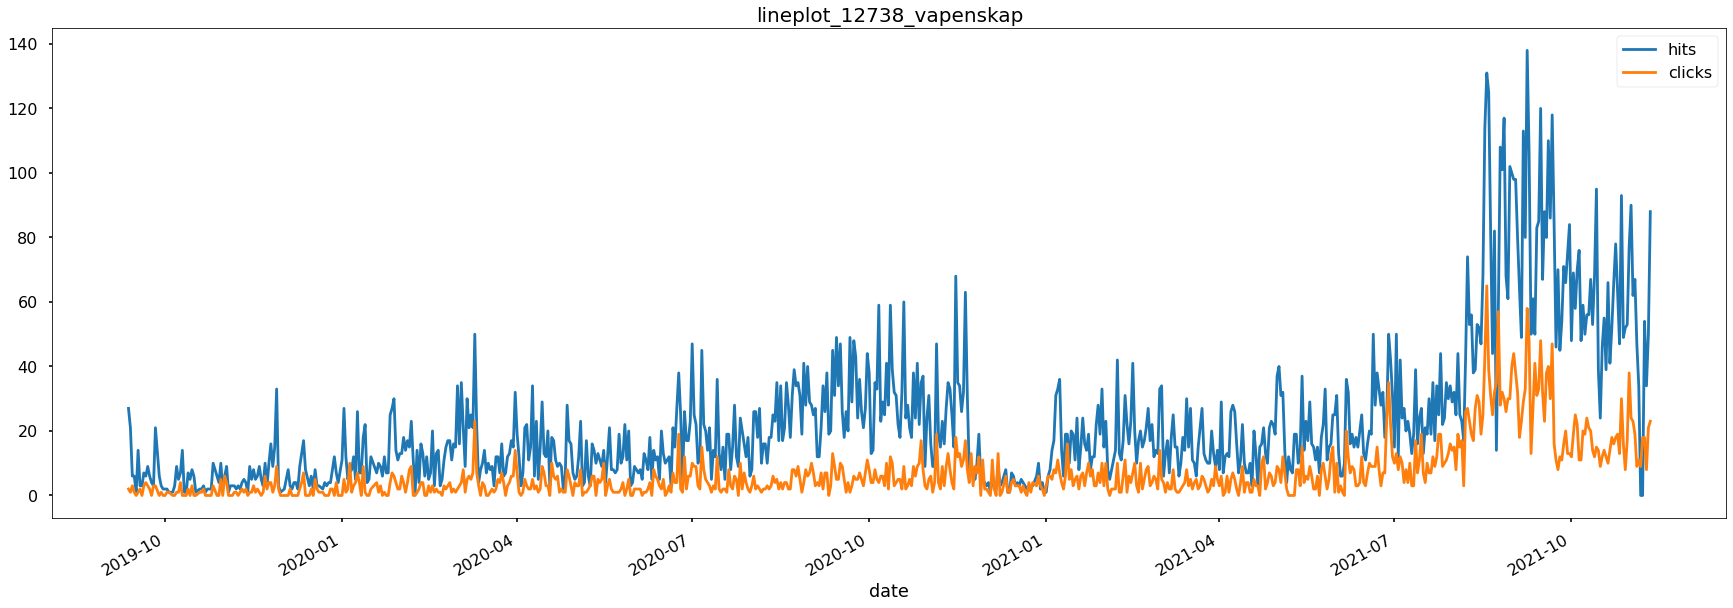

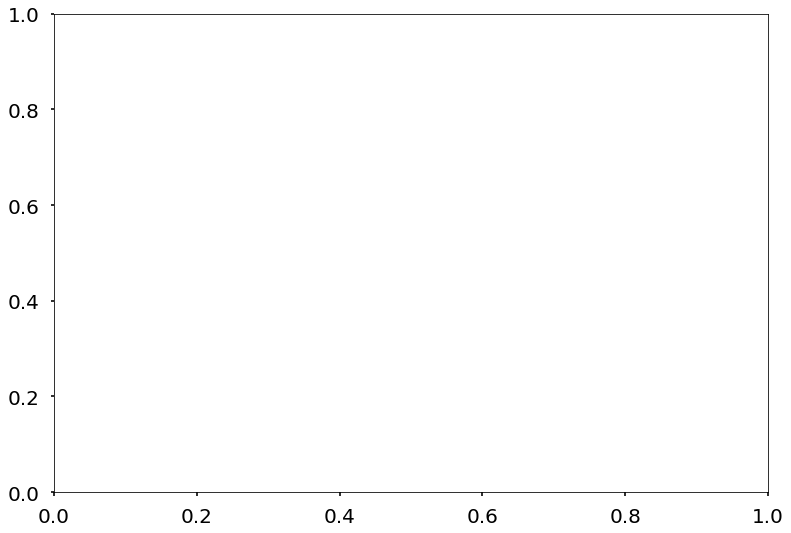

In [15]:
vapenskap = grouped[grouped["cat_id"] == 12738]
vapenskap.head()
name = categories.loc[categories["internal_doc_id"] == 12738]
name.head()
save_fig_for_raport(
        vapenskap.plot(
                x="date", 
                y=["hits", "clicks"], 
                title=f"categori: Våpenskap", 
                figsize=(30, 10)),
        f"lineplot_12738_vapenskap"
        )


<AxesSubplot:title={'center':'categori: Kopp og krus'}, xlabel='date'>

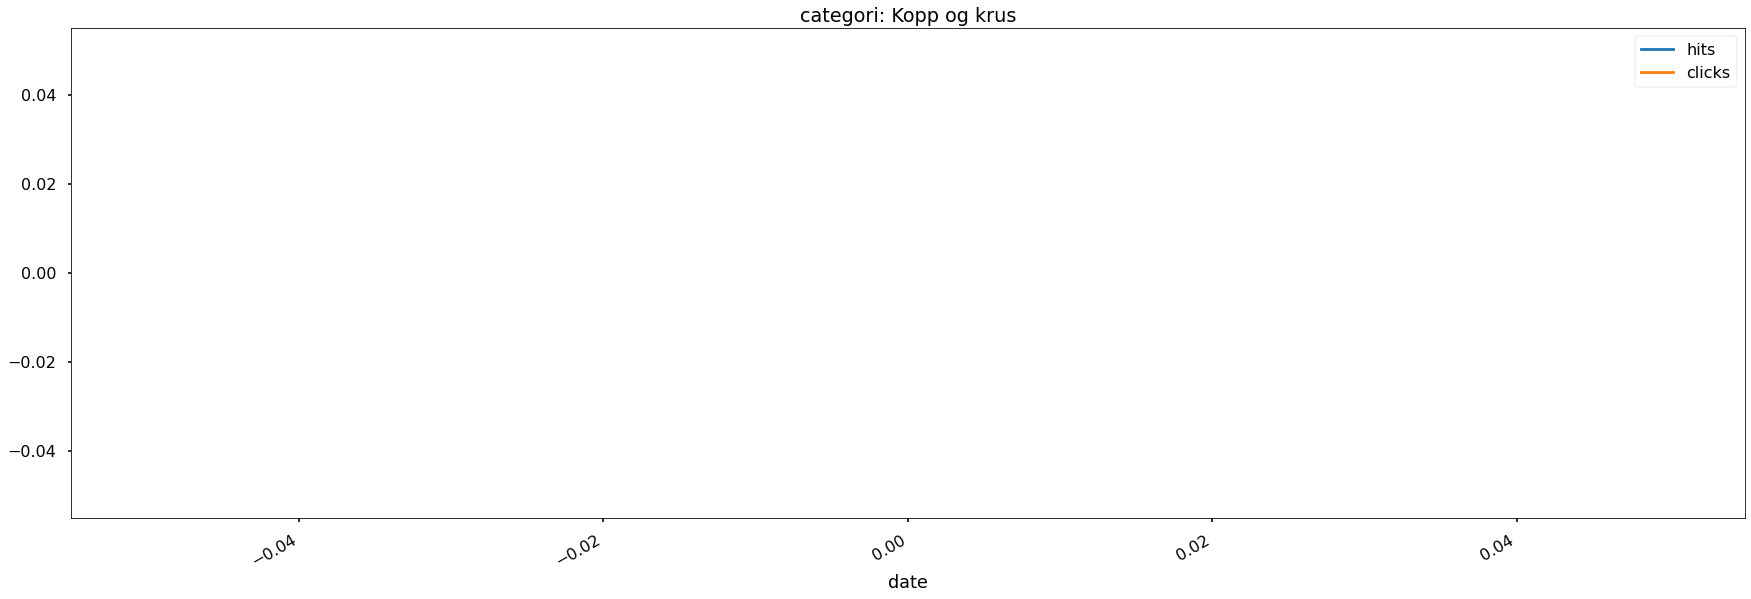

In [16]:
kopp_og_krus = grouped[grouped["cat_id"] == 12663]
kopp_og_krus.head()
name = categories.loc[categories["internal_doc_id"] == 12663]
name.head()
kopp_og_krus.plot(
        x="date", 
        y=["hits", "clicks"], 
        title=f"categori: Kopp og krus", 
        figsize=(30, 10),)


Det virker ikke som om det er data på kopper og krus. Dette burde undersøkes nærmere. Forhåpentligvis finnes dataen, men den er ikke hentet ut og sendt til oss.

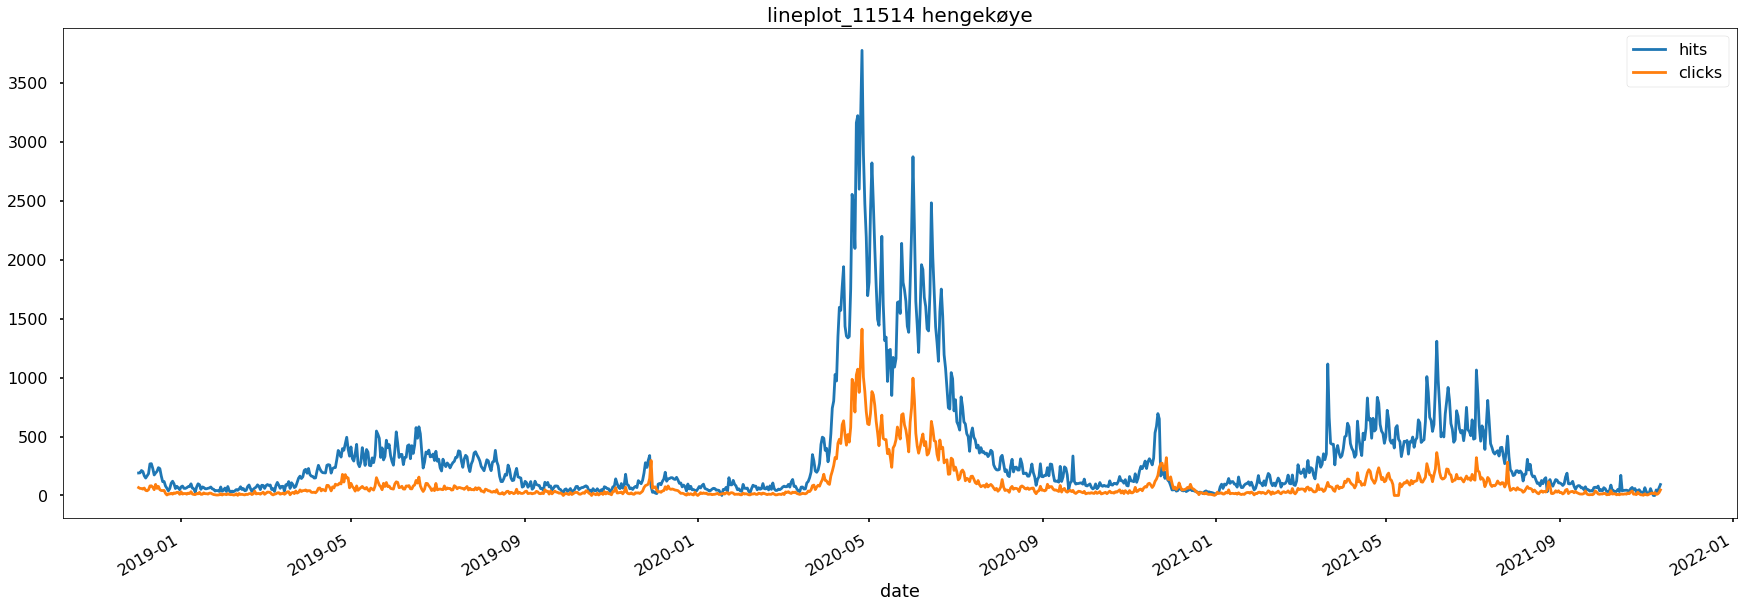

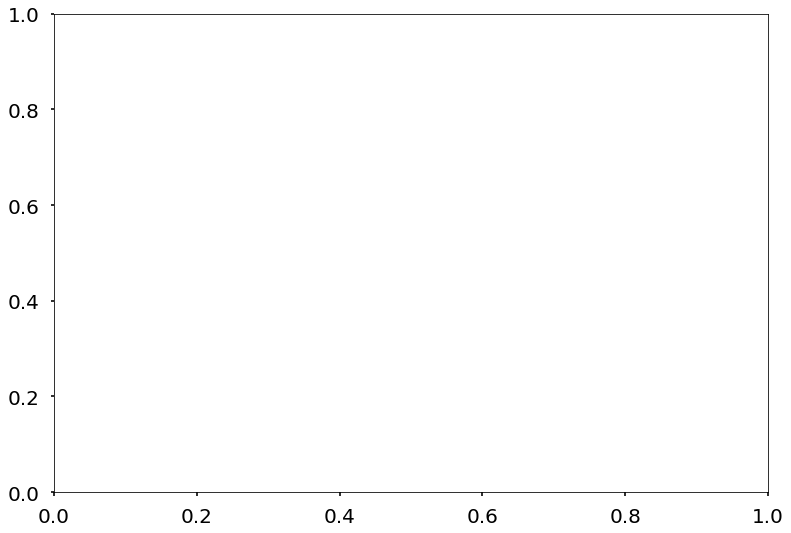

In [17]:
hengekøye = grouped[grouped["cat_id"] == 11514]
hengekøye.head()
name = categories.loc[categories["internal_doc_id"] == 11514]
name.head()
save_fig_for_raport(

        hengekøye.plot(
                x="date", 
                y=["hits", "clicks"], 
                title=f"categori: Hengekøye", 
                figsize=(30, 10),),
        f"lineplot_11514 hengekøye"
)

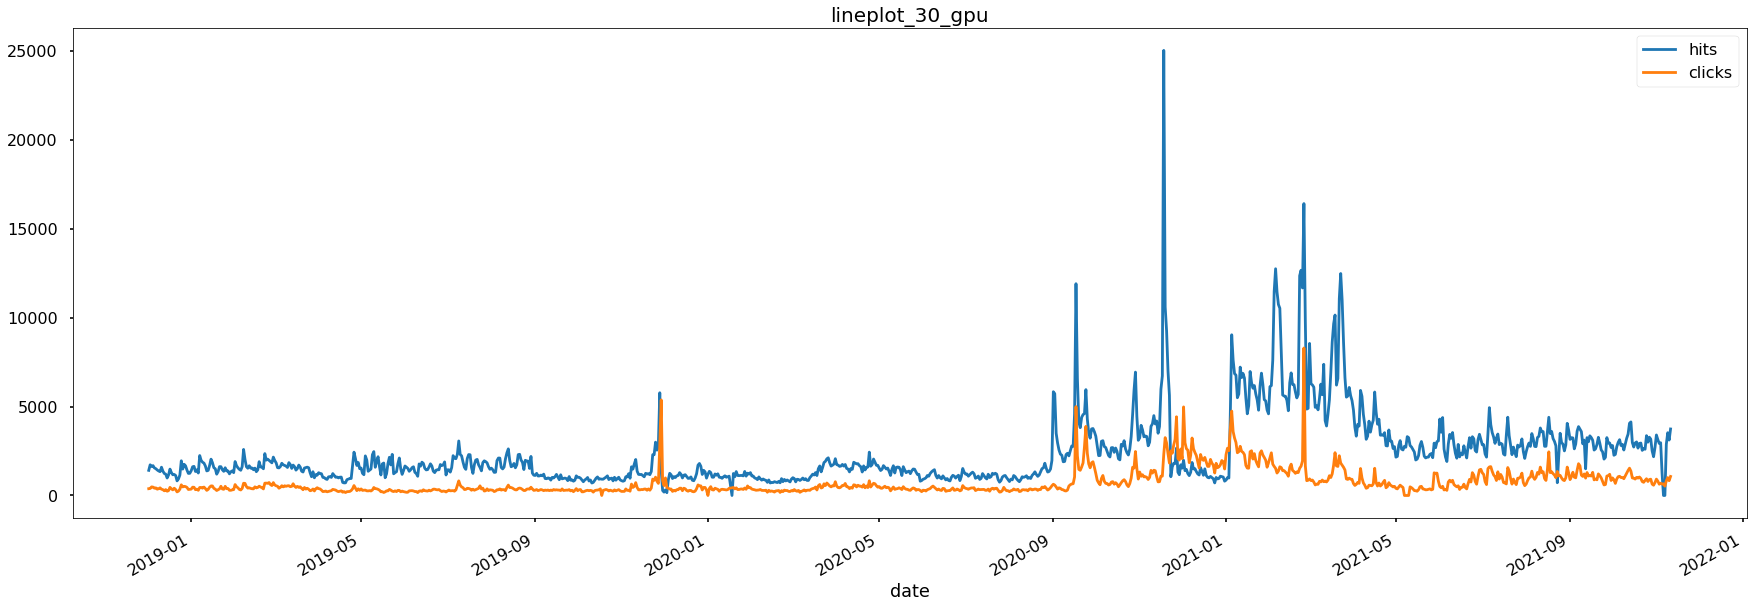

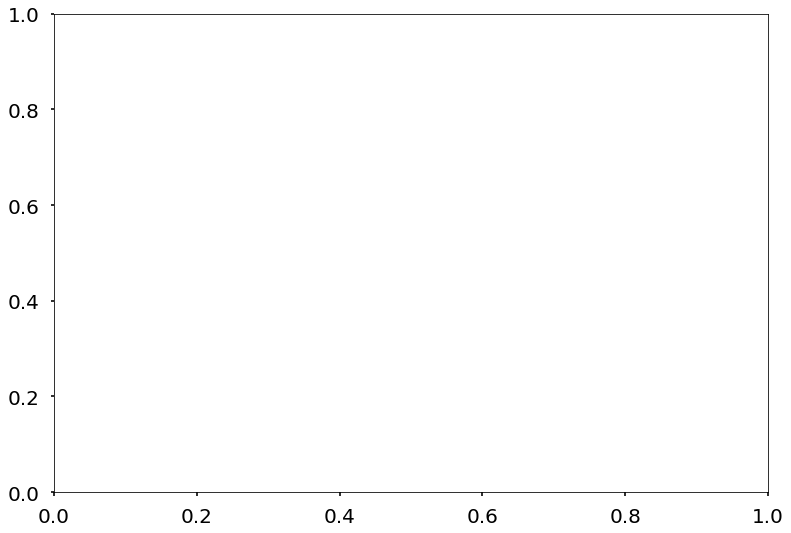

In [18]:
gpu = grouped[grouped["cat_id"] == 30]
gpu.head()
name = categories.loc[categories["internal_doc_id"] == 30]
name.head()
save_fig_for_raport(
        gpu.plot(
                x="date", 
                y=["hits", "clicks"], 
                title=f"categori: {category_id_to_names_map[30]}", 
                figsize=(30, 10),),
        f"lineplot_30_gpu"
)

[[1.         0.57729655]
 [0.57729655 1.        ]]


<AxesSubplot:>

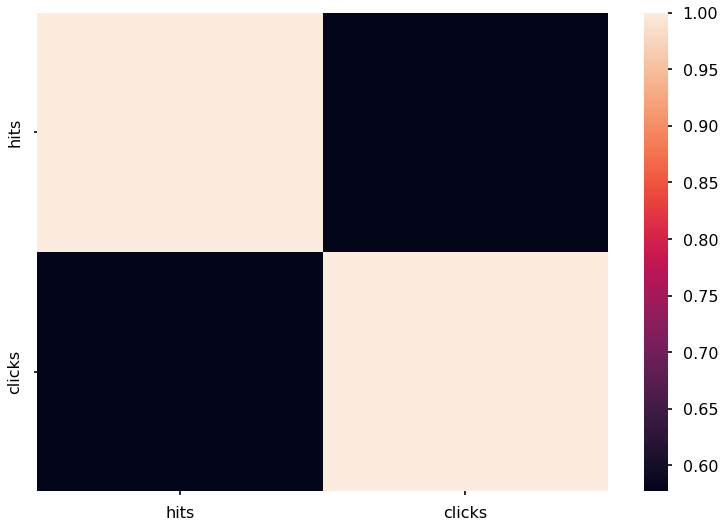

In [19]:
import numpy as np
name.head()
import seaborn as sns
print(np.corrcoef(data["hits"], data["clicks"]))
correlation_matrix = data[["hits", "clicks"]].corr()
sns.heatmap(correlation_matrix)

Høy korrelasjon mellom hits og klicks!

In [20]:
data.describe()

id  product_id  manufacturer_id   cat_id  root_cat_id     hits  \
count 35966868    35966868         35966868 35966868     35966868 35966868   
mean  19187468      331678             6138     8253         7910        4   
std   10568188       84932             5026     5158         5156       21   
min     278160        2682                0        2          101        0   
25%   10132023      272422             1215      249          128        1   
50%   19190412      332912             5701    11258        11390        1   
75%   28422894      392671             9674    11642        11747        3   
max   37414611      531583            21109    13771        12254    38420   

        clicks  
count 35966868  
mean         1  
std          9  
min          0  
25%          0  
50%          0  
75%          1  
max      37621

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35966868 entries, 0 to 35966867
Data columns (total 9 columns):
 #   Column           Dtype         
---  ------           -----         
 0   id               int64         
 1   product_id       int64         
 2   manufacturer_id  int64         
 3   cat_id           int64         
 4   root_cat_id      int64         
 5   date             datetime64[ns]
 6   hits             int64         
 7   clicks           int64         
 8   last_modified    object        
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 2.4+ GB


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'product_id'}>,
        <AxesSubplot:title={'center':'manufacturer_id'}>],
       [<AxesSubplot:title={'center':'cat_id'}>,
        <AxesSubplot:title={'center':'root_cat_id'}>,
        <AxesSubplot:title={'center':'date'}>],
       [<AxesSubplot:title={'center':'hits'}>,
        <AxesSubplot:title={'center':'clicks'}>, <AxesSubplot:>]],
      dtype=object)

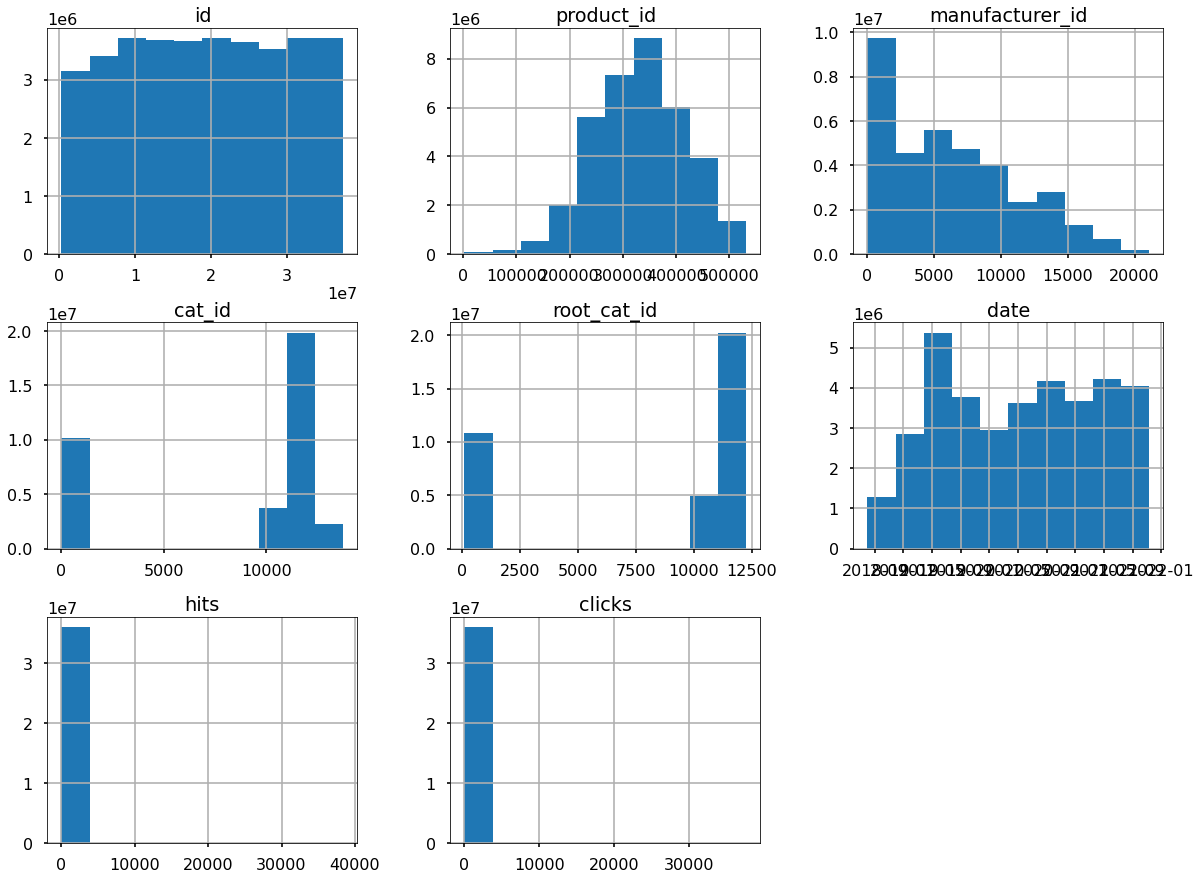

In [22]:
data.hist(figsize=(20,15))

In [23]:

# correlation_matrix = data.corr()
# sns.heatmap(correlation_matrix)
data_by_cat_id = grouped.pivot(index=["date"], columns=["cat_id"])["hits"]
data_by_cat_id.tail()

cat_id      2      5      6      9      10     11     13     14     15     \
date                                                                        
2021-11-07      0      0      0      0      0      0      0    NaN    NaN   
2021-11-08   1833    697    110    790    262     60    202      4    NaN   
2021-11-09   1980    602    120    819    316     51    209     11      2   
2021-11-10   2018    645    135    665    356     61    292    NaN      1   
2021-11-11   3241    711    135    904    464     82    341     10      5   

cat_id      16     ...  13748  13751  13758  13759  13764  13765  13767  \
date               ...                                                    
2021-11-07      0  ...      0    NaN    NaN      0      0    NaN    NaN   
2021-11-08     19  ...      4    NaN    NaN      7      7      5      1   
2021-11-09     31  ...      5    NaN      1      6     11     10      1   
2021-11-10     34  ...    NaN    NaN      3     12     11     10      1   
2021-11-11     25  ...      3    NaN      2      7      8     17    NaN   

cat_id      13769  13770  13771  
date                             
2021-11-07      0      0      0  
2021-11-08     17      2     36  
2021-11-09     13      1     16  
2021-11-10     12      2     19  
2021-11-11     17      2     24  

[5 rows x 1325 columns]

In [24]:
# Check the validity of the pivot table
grouped_joined[(grouped_joined['date'] == '2021-09-12') & (grouped_joined['cat_id'] == 13759)]
# Seems to check out

cat_id       date  hits  clicks  product_id      cat_name
1006685   13759 2021-09-12     0       1      522293  Toalettpapir

cat_id  2      5      6      9      10     11     13     14     15     16     \
cat_id                                                                         
2           1      0      1      1      1      1      1      0      0      0   
5           0      1      0      1      1      0      1      0      0      0   
6           1      0      1      0      1      1      0      0      0     -0   
9           1      1      0      1      1      1      1      0      0      0   
10          1      1      1      1      1      1      1      0      0      0   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
13765     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
13767     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
13769     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
13770     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
13771     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

cat_id  ...  13748  13751  13758  13759  13764  13765  13767  13769  13770  \
cat_id  ...                                                                  
2       ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5       ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
6       ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
9       ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
10      ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
13765   ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
13767   ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
13769   ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
13770   ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
13771   ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

cat_id  13771  
cat_id         
2         NaN  
5         NaN  
6         NaN  
9         NaN  
10        NaN  
...       ...  
13765     NaN  
13767     NaN  
13769     NaN  
13770     NaN  
13771     NaN  

[1325 rows x 1325 columns]

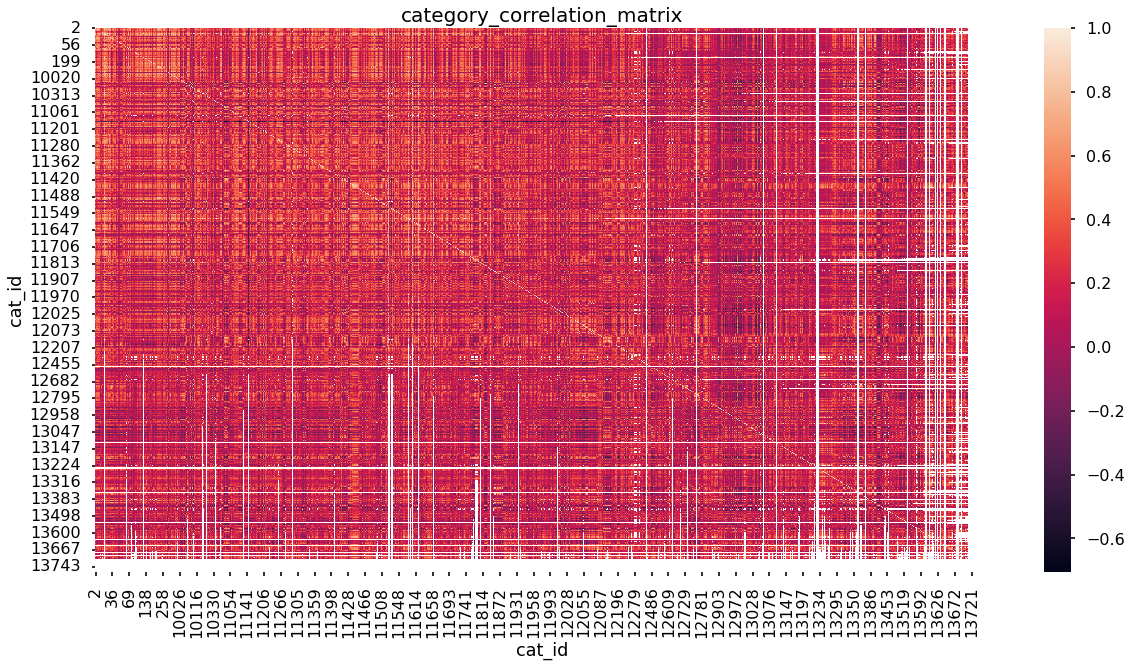

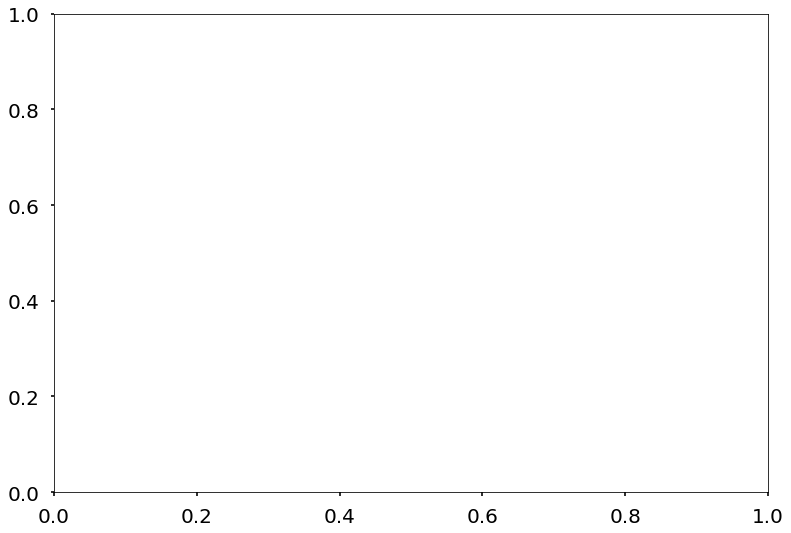

In [25]:
import seaborn as sns
# Require at least 200 observations for correlation to be valid
category_correlation = data_by_cat_id.corr(min_periods=100)
plt.figure(figsize=(20,10))
save_fig_for_raport(
  sns.heatmap(category_correlation),
  "category_correlation_matrix"  
)
category_correlation

In [26]:
category_correlation.to_csv("../datasets/category_correlation.csv")

In [27]:
# Find number of correlations with bærbar-pc som ikke er 0 eller 1
pc_correlations = category_correlation[2].dropna()
print("Number of correlations with bærbar pc which is not 0 or 1: ",
  len(
  list(
    filter(lambda x: x != 0 and x != 1, 
       pc_correlations
      )
  )
))
print("Number of correlations with bærbar pc which is 1: ",list(filter(lambda x: x == 1, pc_correlations)))

Number of correlations with bærbar pc which is not 0 or 1:  1262
Number of correlations with bærbar pc which is 1:  [1.0]


In [28]:
cpu_id = category_name_to_id_map['Prosessor (CPU)']
gpu_id = category_name_to_id_map['Grafikkort (GPU)']
cpu_gpu_correlation = data_by_cat_id.loc[:, [cpu_id, gpu_id]].corr()
print(cpu_gpu_correlation)
data_by_cat_id.loc[:, [cpu_id, gpu_id]]

cat_id  5   30
cat_id        
5        1   0
30       0   1


cat_id      5    30
date               
2018-12-02 855 1414
2018-12-03 807 1726
2018-12-04 795 1629
2018-12-05 831 1681
2018-12-06 710 1550
...         ..  ...
2021-11-07   0    0
2021-11-08 697 2881
2021-11-09 602 3531
2021-11-10 645 3119
2021-11-11 711 3741

[1074 rows x 2 columns]

Ser ikke ut som CPU eller GPU korrelerer i det hele tatt

Digitalkamera
Bærbar PC
cat_id  2  6
cat_id      
2       1  1
6       1  1


cat_id        2   6
date               
2018-12-02 2450 417
2018-12-03 2889 432
2018-12-04 3048 483
2018-12-05 2777 391
2018-12-06 2882 372
...         ...  ..
2021-11-07    0   0
2021-11-08 1833 110
2021-11-09 1980 120
2021-11-10 2018 135
2021-11-11 3241 135

[1074 rows x 2 columns]

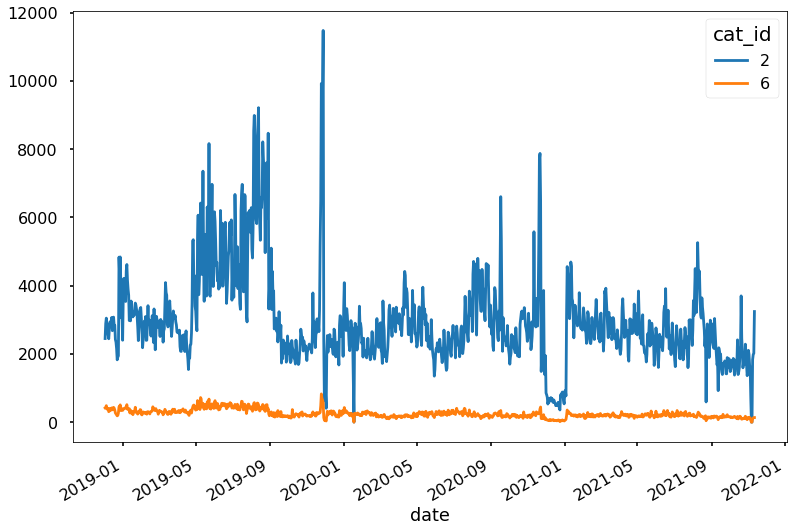

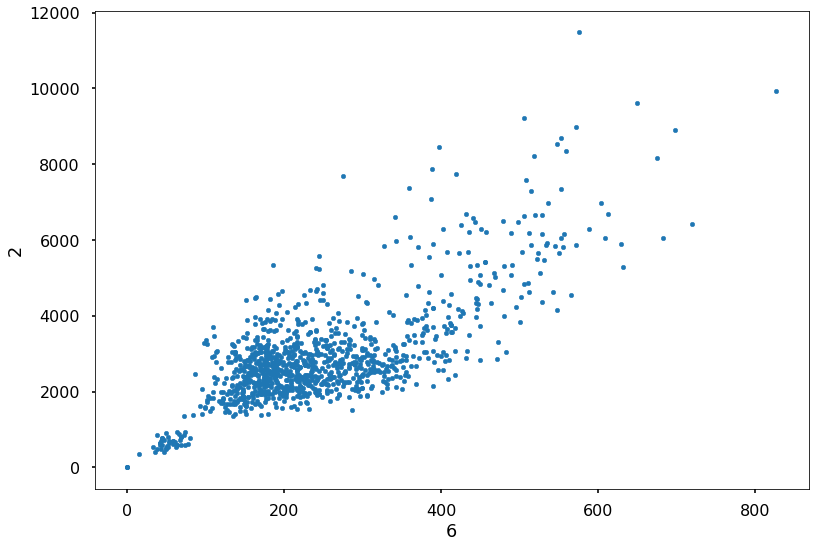

In [29]:
print(category_id_to_names_map[6])
print(category_id_to_names_map[2])
two_six = data_by_cat_id.loc[:, [2, 6]]
two_six.plot()
two_six.plot.scatter(x=6,y=2)
two_six_corr =two_six.corr()
print(two_six_corr)
two_six

Hvorfor korrelerer disse 100%?

Toalettpapir
Bærbar PC
cat_id  2      13759
cat_id              
2           1      0
13759       0      1


cat_id      2      13759
date                    
2018-12-02   2450    NaN
2018-12-03   2889    NaN
2018-12-04   3048    NaN
2018-12-05   2777    NaN
2018-12-06   2882    NaN
...           ...    ...
2021-11-07      0      0
2021-11-08   1833      7
2021-11-09   1980      6
2021-11-10   2018     12
2021-11-11   3241      7

[1074 rows x 2 columns]

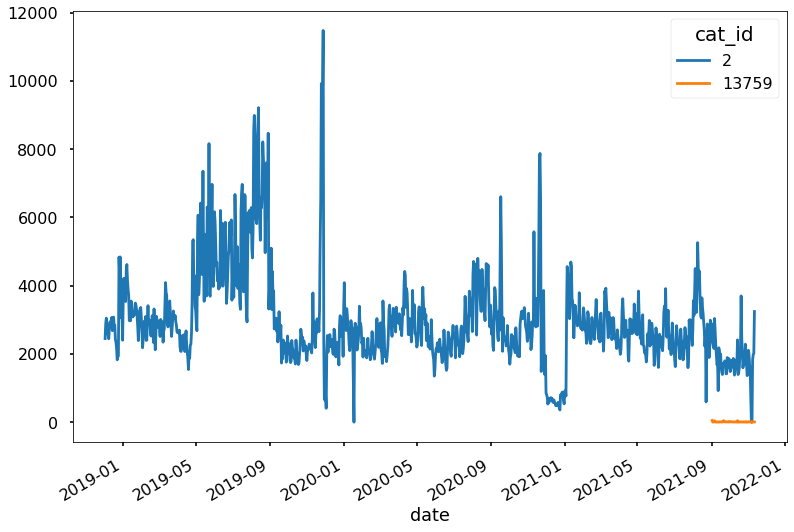

In [30]:

print(category_id_to_names_map[13759])
print(category_id_to_names_map[2])
dopapir_pc = data_by_cat_id.loc[:, [2,  13759]]
dopapir_pc.plot()
dopapir_pc_corr = dopapir_pc.corr()
print(dopapir_pc_corr)
dopapir_pc

Ser ut som dopapir og PC kun korrelerer 100 % fordi dopapir er en ny kategori

In [31]:
# Save some statistics for Mobiltelefon
dataframe_to_latex_tabular(
  grouped_joined[grouped_joined["cat_id"] == category_name_to_id_map['Mobiltelefon']].drop("product_id", axis=1).describe(),
  caption="Mobiltelefon statistics",
  label="Mobiltelefon_statistics",
  add_index=True
)

## How many categories has 0 values in a given day?

cat_id
2           0
5           0
6           0
9           0
10          0
         ... 
13765    1029
13767    1059
13769    1051
13770    1060
13771    1066
Length: 1325, dtype: int64

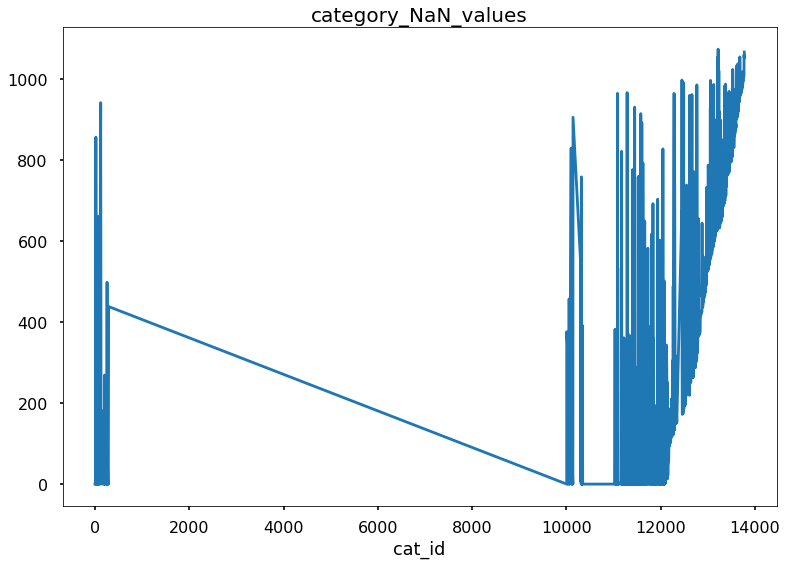

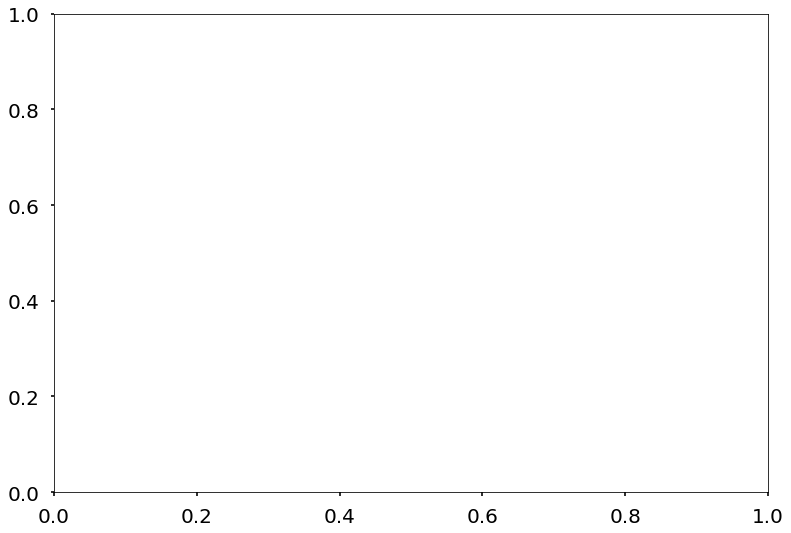

In [32]:
save_fig_for_raport(
  data_by_cat_id.isna().sum().plot(),
  name="category_NaN_values"
)
data_by_cat_id.isna().sum()

cat_id
2        3
5        3
6        3
9        3
10       3
        ..
13765    1
13767    1
13769    2
13770    1
13771    2
Length: 1325, dtype: int64

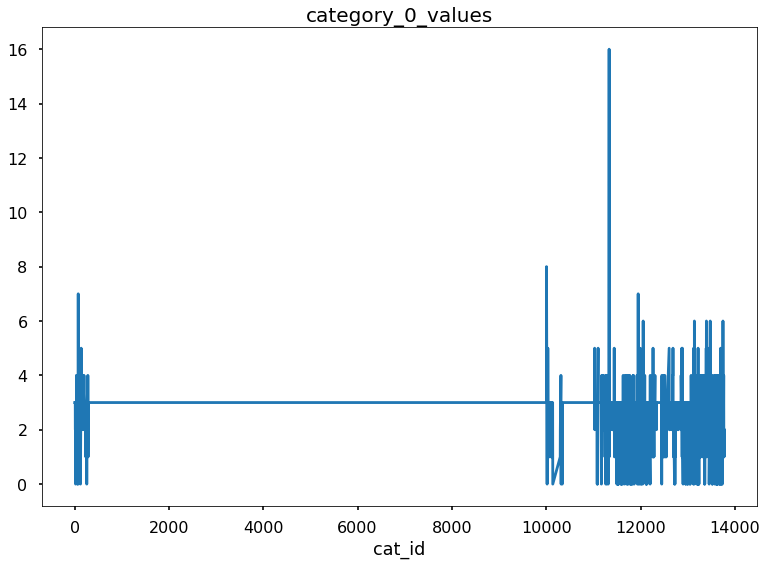

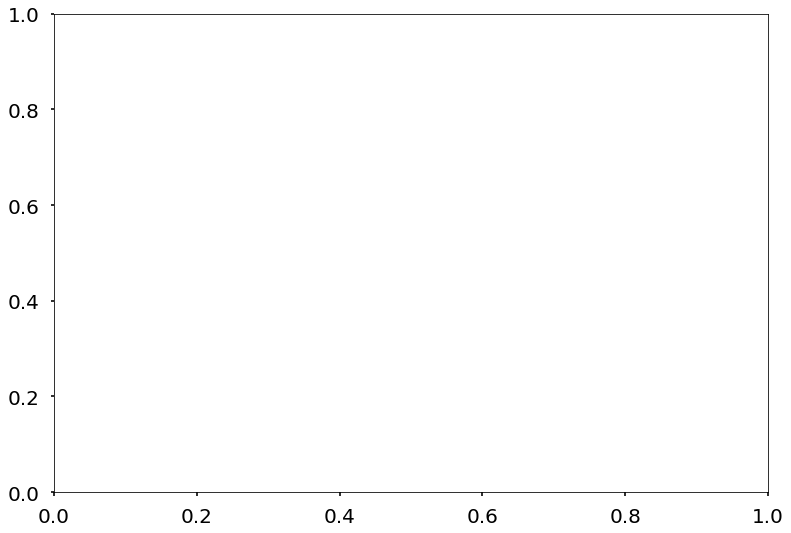

In [33]:
save_fig_for_raport(
    data_by_cat_id.isin([0]).sum().plot(),
    name="category_0_values"
 )
data_by_cat_id.isin([0]).sum()

## Lag plot

resource: http://www.itl.nist.gov/div898/handbook/eda/section3/lagplot.htm

In the graph below, firt axis represents the t(lag), seond axis represents t+1

Ex: if data is, [1,4,5,3,2], then y(t):= [1,4,5,3,2], y(t+1): = [4,5,3,2]

As we see the graph below, this suggests the non-random pattern (graph is poistively linear).

Non-randomness in the data reveals that we could use an autoregressive model

In [34]:
from pandas.plotting import lag_plot

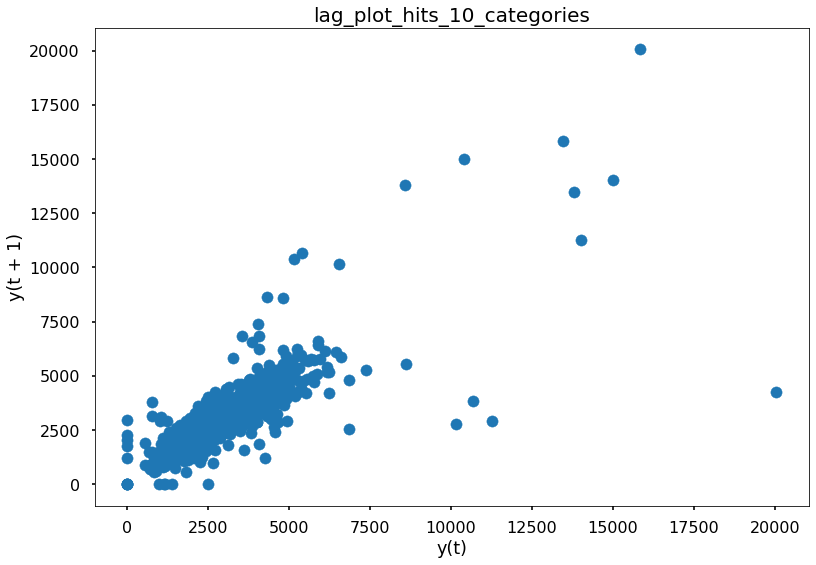

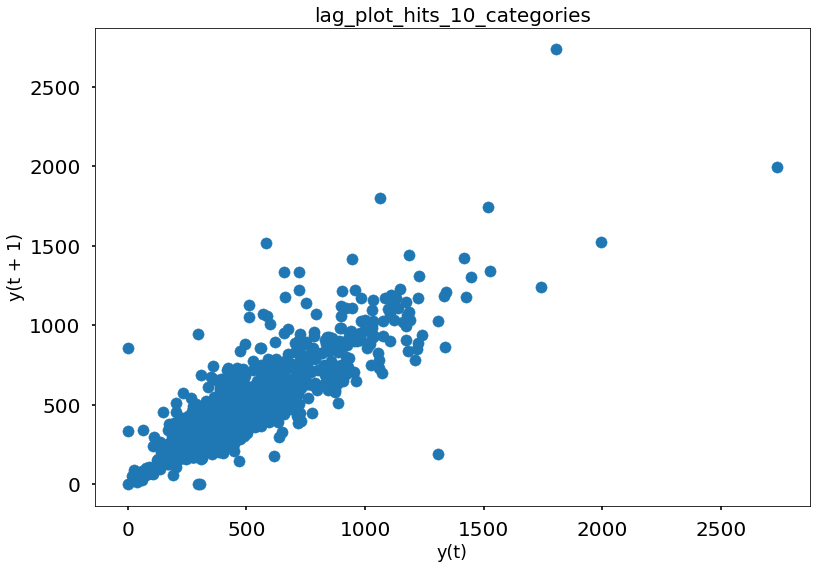

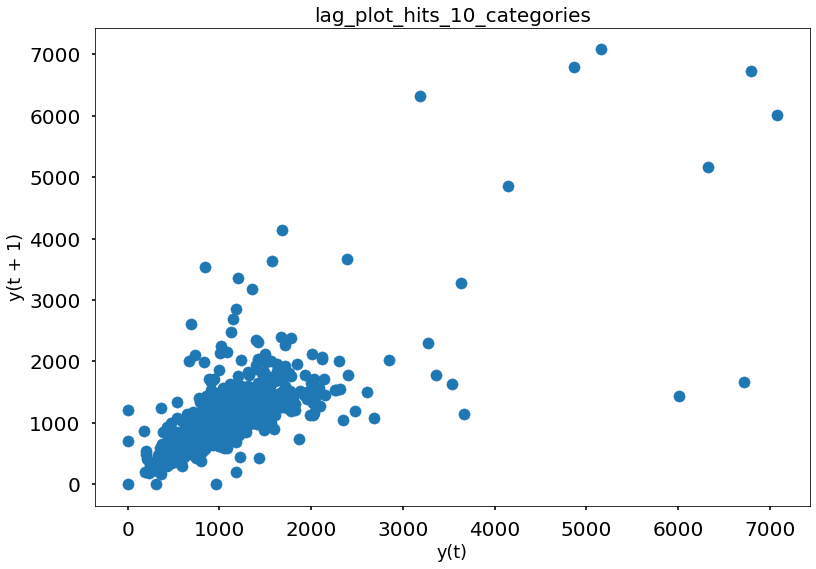

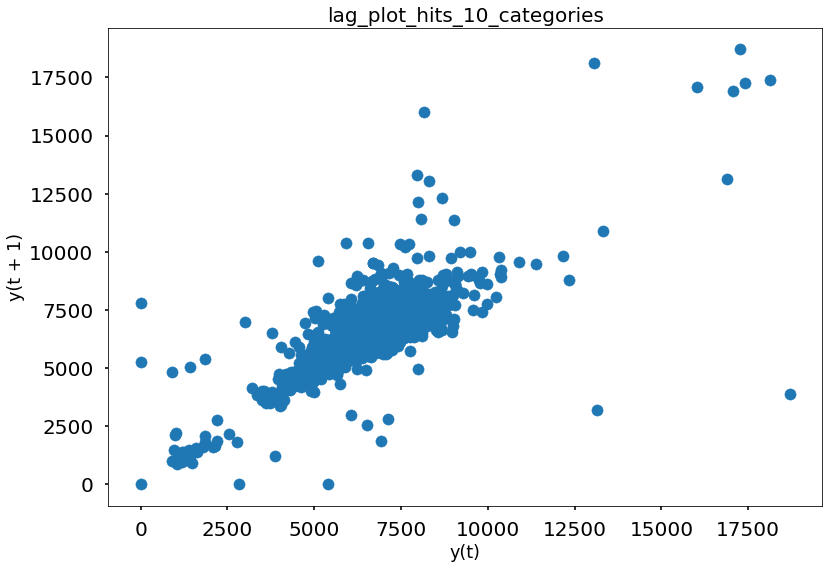

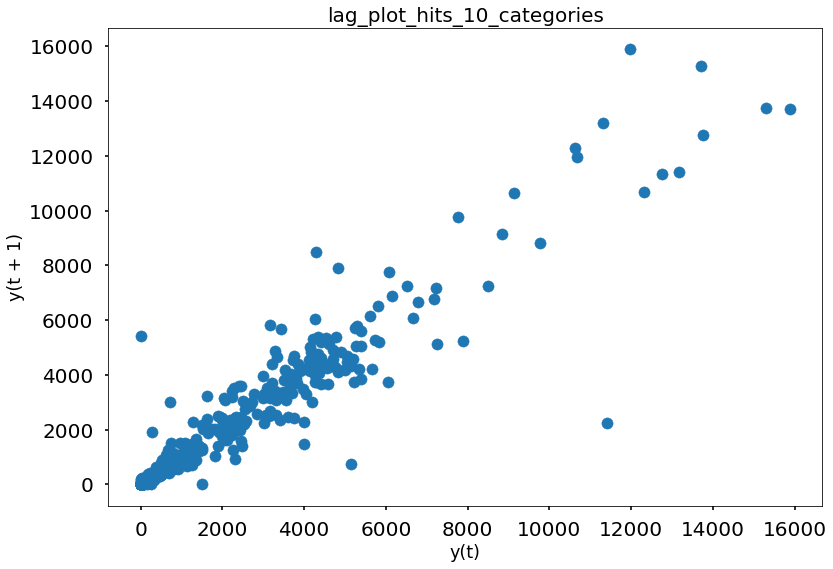

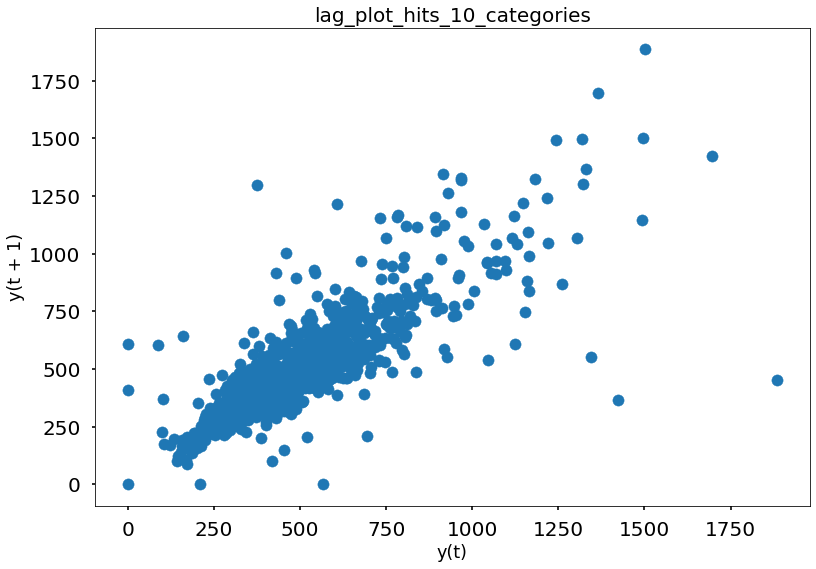

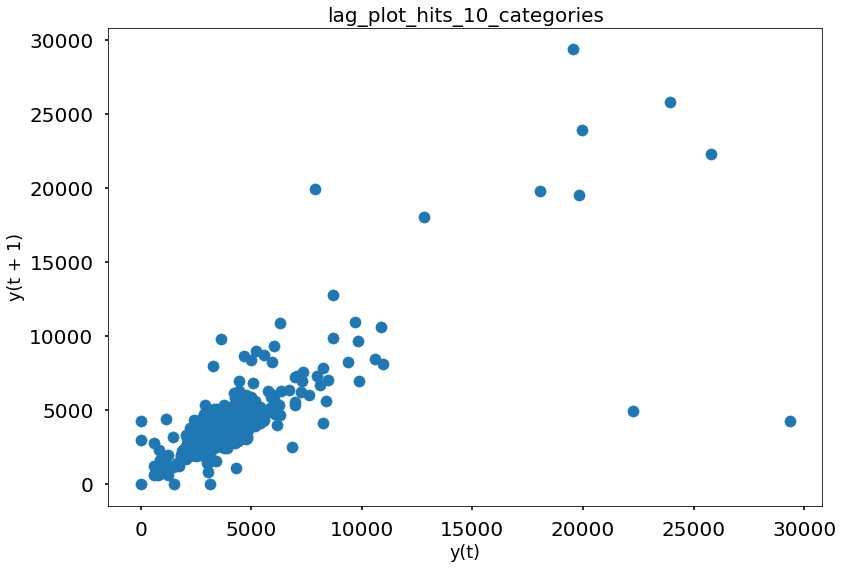

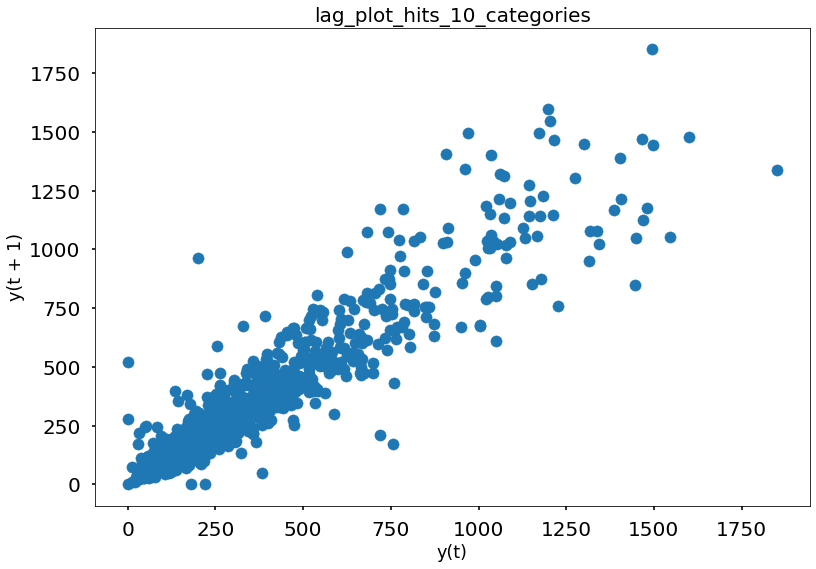

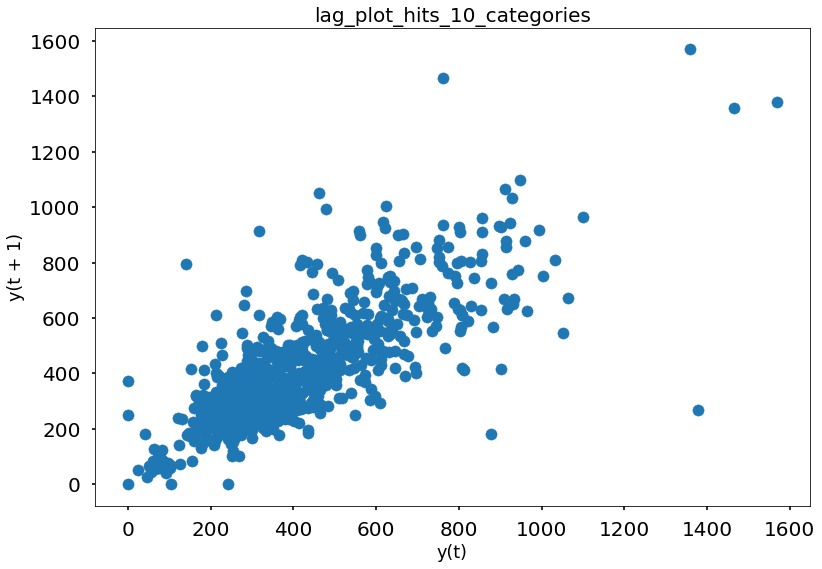

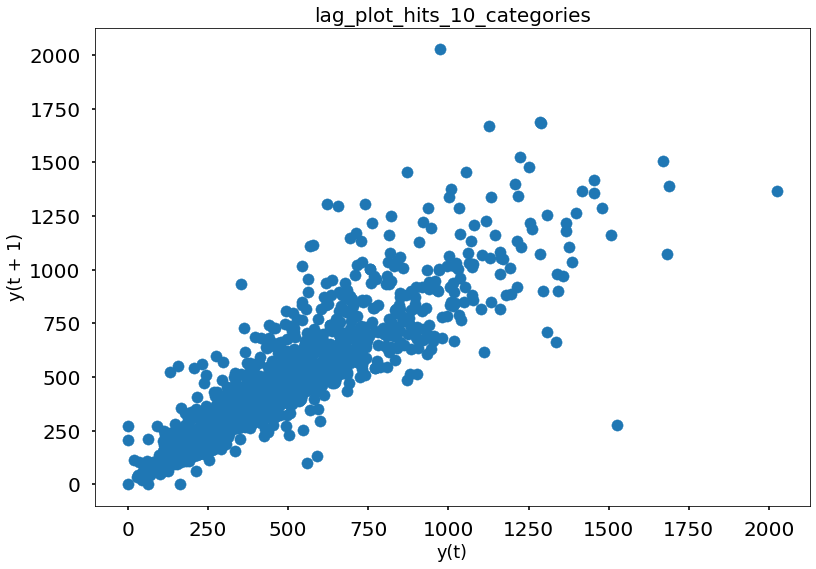

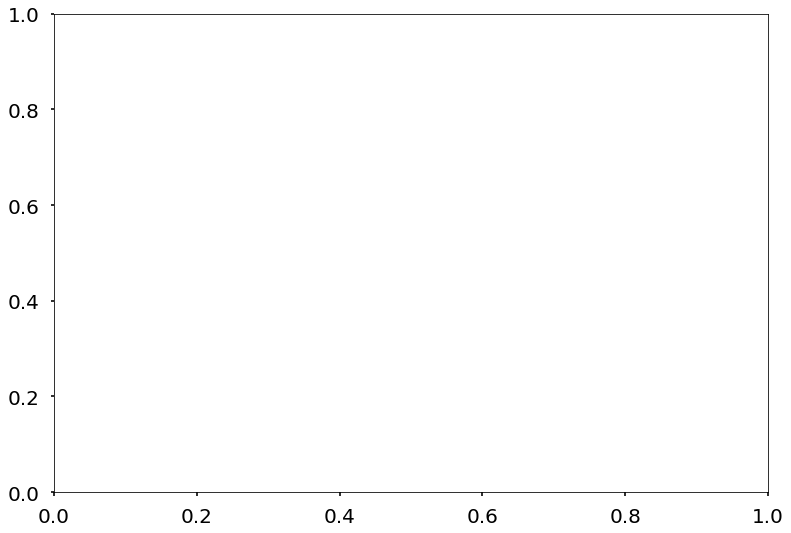

In [35]:
lag_plot(grouped_joined[grouped_joined["cat_id"] == category_name_to_id_map['Mobiltelefon']]["clicks"])
for cat_id in all_categories[:10]:
  save_fig_for_raport(
    lag_plot(grouped_joined[grouped_joined["cat_id"] == cat_id]["hits"]),
    name=f"lag_plot_hits_10_categories"
  )

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 7)'>

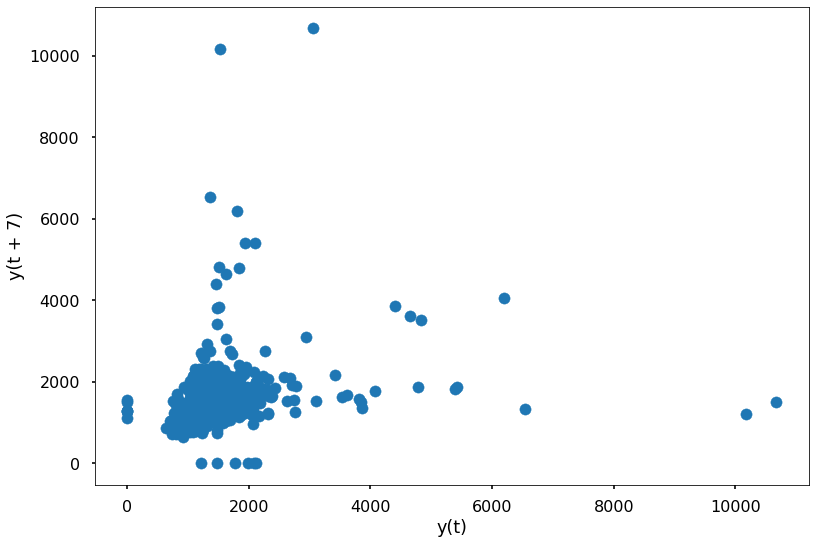

In [36]:

lag_plot(
  grouped_joined[grouped_joined["cat_id"] == category_name_to_id_map['Mobiltelefon']]["clicks"],
  lag=7
  )

https://www.itl.nist.gov/div898/handbook/eda/section3/lagplot.htm

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

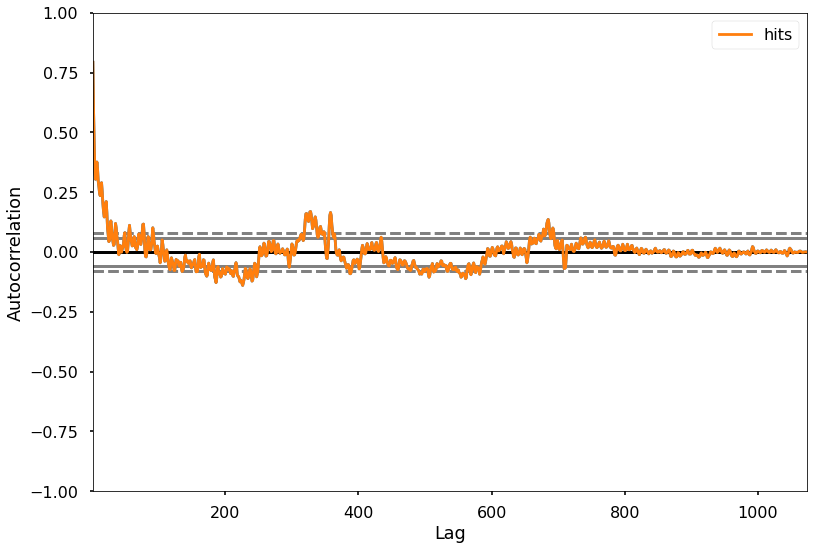

In [37]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(grouped_joined[grouped_joined["cat_id"] == category_name_to_id_map['Mobiltelefon']]["hits"])
autocorrelation_plot(grouped_joined[grouped_joined["cat_id"] == category_name_to_id_map['Mobiltelefon']]["hits"], 
  label="hits",
  )

resource: http://www.itl.nist.gov/div898/handbook/eda/section3/eda35c.htm

A lag plot above shows the structure in the data. In order to quantify the correlation between the point at t and point at t+1 withe respect to expectation, autocrrelation is used.

A black line in the graph below shows the expectation for random data(thus 0 correlation) and two dash lines above and below it represent the confidence interval with each 95% and 99%.

The graph shows a strong correlation for lags of < 100 days. (lag 0 is always 1 corrleation)

/home/archie/code/Masteroppgave/env/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


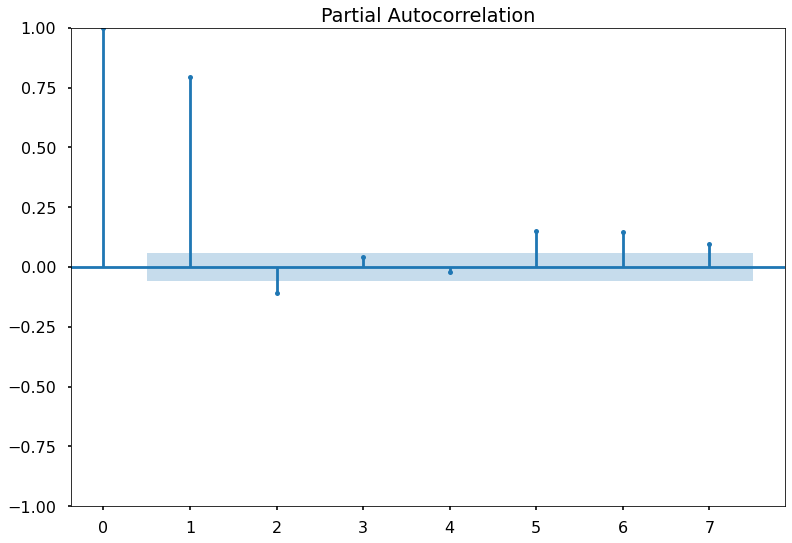

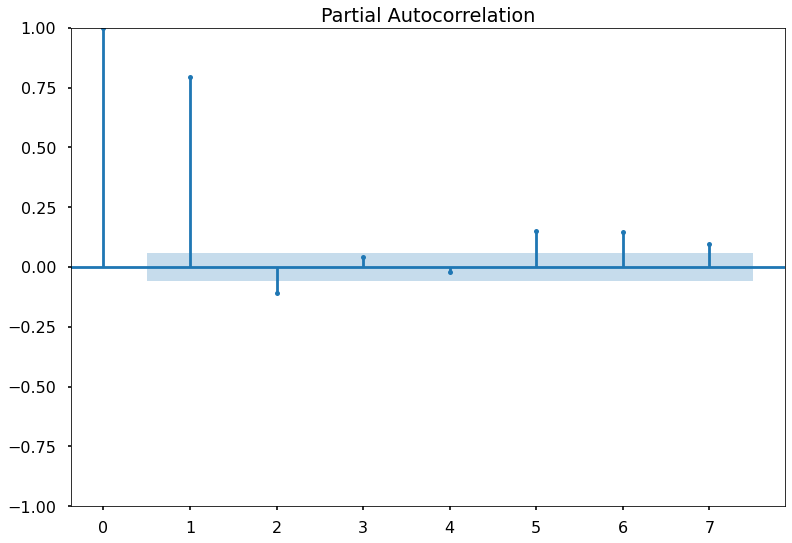

In [38]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(
  grouped_joined[grouped_joined["cat_id"] == category_name_to_id_map['Mobiltelefon']]["hits"],
  lags=7
  )

In [39]:

analysis = grouped_joined[(grouped_joined["cat_id"] == category_name_to_id_map['Mobiltelefon']) & (grouped_joined["hits"] != 0)][["date", "hits"]].dropna()
analysis.set_index("date", inplace=True)
analysis.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1071 entries, 2018-12-02 to 2021-11-11
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   hits    1071 non-null   int64
dtypes: int64(1)
memory usage: 16.7 KB


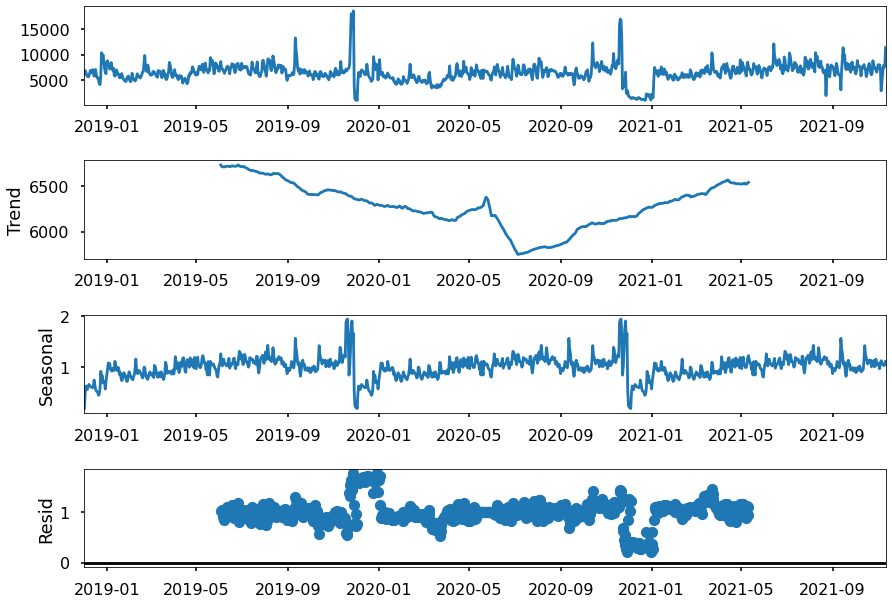

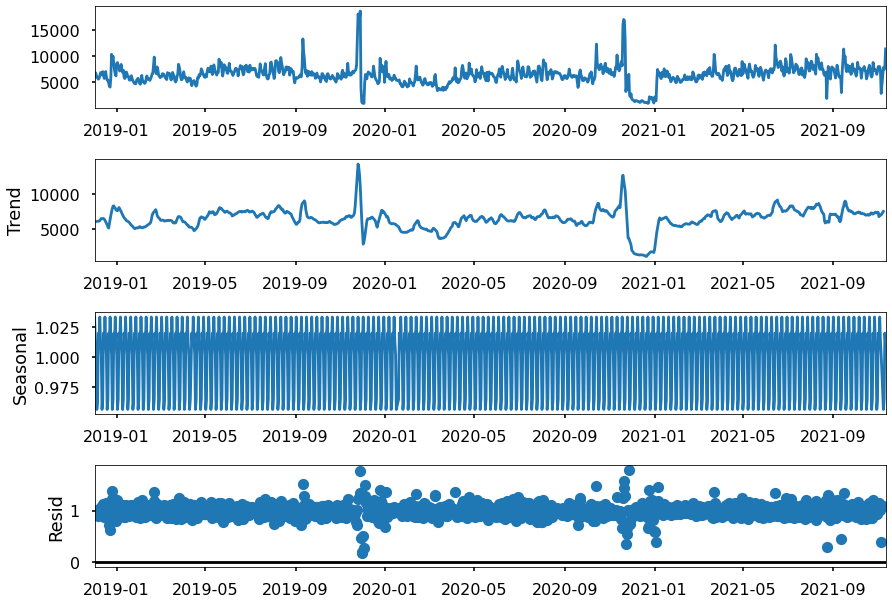

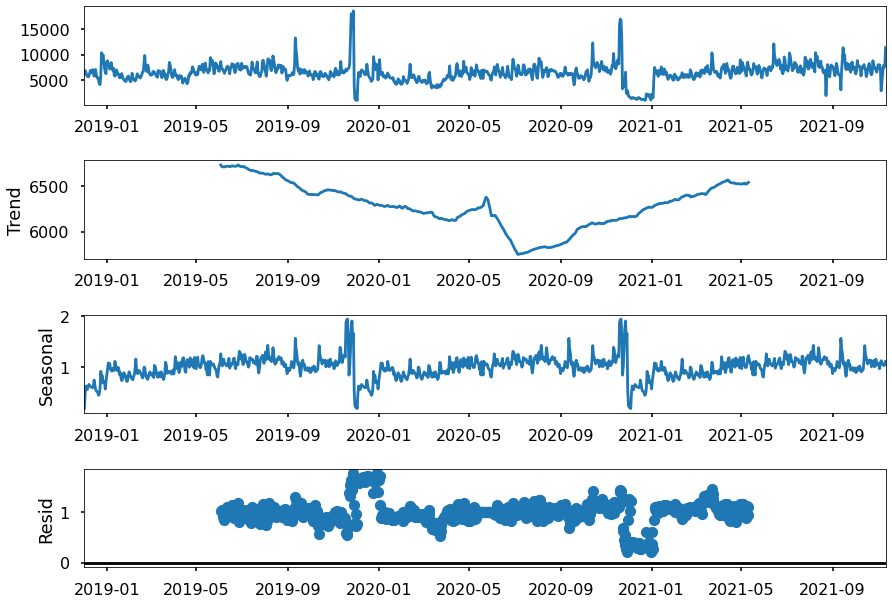

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose



decompose_result_mult = seasonal_decompose(analysis, model="multiplicative", period=7)
decompose_result_mult_year = seasonal_decompose(analysis, model="multiplicative", period=365)

# trend = decompose_result_mult.trend
# seasonal = decompose_result_mult.seasonal
# residual = decompose_result_mult.resid

decompose_result_mult.plot()
decompose_result_mult_year.plot()